In [1]:
import h5py
import numpy as np
import math
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as spline
from scipy.fftpack import fft, fftshift ,ifft,rfft,fftfreq,rfftfreq
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Frequency=1/Time

In [2]:
EOS=['ALF2','APR4','GAM2','GNH3','H4','SLy']
MASS=['1200','1225','1250','1275','1300','1325','1350','1375','1400','1425','1450','1475','1500']
Q=['10','08','09']
point=['5000','4500','4000','3500','3000','2500','2000','1500','1000','500']

Define functions to calculate different expected frequencies

For q=1

In [3]:
def f20(M,R6):
    return 8.943+4.059*M-1.332*R6-.358*(M**2)-.182*R6*M+.048*(R6**2)

In [4]:
def fspir(M,R8):
    return 6.264+1.929*M-.645*R8+.881*(M**2)-.311*R8*M+.03*(R8**2)

In [5]:
def fpeak(M,R6):
    return 13.822-0.576*M-1.375*R6+.479*(M**2)-.073*R6*M+.044*(R6**2)

For all cases

In [6]:
def f20_a(M,R6):
    return 9.586+4.09*M-1.427*R6+.048*(M**2)-.261*R6*M+.055*(R6**2)

In [7]:
def fspir_a(M,R8):
    return 5.846+1.75*M-.555*R8+1.002*(M**2)-.316*R8*M+.026*(R8**2)

In [8]:
def fpeak_a(M,R8):
    return 10.942-.369*M-.987*R8+1.095*(M**2)-.201*R8*M+.036*(R8**2)

Define the functions to do the analysis

In [9]:
def fre_do(x,y,mass):
    fd=fft(y)
    N=len(y)
    if (N % 2) == 1:
        N=N+1
    T=x[1]-x[0]
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    fq=fftfreq(len(y))
    mask=fq>=0
    fd=2.0*(fd/N)
    fd=fd[mask]
    fd=abs(fd)
    return xf,fd
    

In [10]:
def analyze(rhM,time,mass):
    
    
    
    peaks,prop=scipy.signal.find_peaks(abs(rhM))
    ampls=rhM[peaks]
    merg=np.amax(abs(ampls))
    merg=np.where(abs(ampls)==merg)
    merg=int(merg[0])
    t1=peaks[merg]
    
    for mj in range(len(time)):
        if time[mj]>0.0:
            flag='pos'
            t0=mj
            break
        
    ampl=rhM[t0:]
    tim=time[t0:]
    
    #ampl=rhM
    #tim=time
    
    tuk=signal.tukey(len(ampl),0.03)
    dat=ampl*tuk
    
    fq,fd=fre_do(tim,dat,mass)
    
    mx=np.where(fd==np.amax(fd))[0][0]
    freq=fq[mx]
    amp=fd[mx]
    
    return fq,fd,tim,dat
    

#### Example

In [11]:
nam='data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat'
f=open(nam,'r')
lines=f.readlines()[13:]

result1=[]
result2=[]
result3=[]

for x in lines:
    for i in range(len(x.split(' '))):
        if x.split(' ')[i]!='':
            result1.append(x.split(' ')[i])
            for j in range(i+1,len(x.split(' '))): 
                if x.split(' ')[j]!='':
                    result2.append(x.split(' ')[j])
                    for k in range(j+1,len(x.split(' '))):
                        if x.split(' ')[k]!='':
                            result3.append(x.split(' ')[k])
                            break
                    break
            break

time=[float(i) for i in result1]
rh1=[float(i) for i in result2]
rh2=[float(i) for i in result3]

rh=np.empty(len(rh1))
for i in range(len(rh1)):
    rh[i]=rh1[i]+rh2[i]

In [12]:
for i in range(len(rh1)):
    print(result1[i],result2[i],result3[i])

-1.5001531748671e+03 1.0873984065603e-01 2.9344871526902e-01

-1.4984731748671e+03 9.8001349006850e-02 2.9726529480050e-01

-1.4967931748671e+03 8.7128790773505e-02 3.0069058745631e-01

-1.4951131748671e+03 7.6136288070515e-02 3.0371971852289e-01

-1.4934331748671e+03 6.5038142513830e-02 3.0634832487561e-01

-1.4917531748671e+03 5.3848816831355e-02 3.0857256339619e-01

-1.4900731748671e+03 4.2582915873941e-02 3.1038911950824e-01

-1.4883931748671e+03 3.1255167248385e-02 3.1179521496675e-01

-1.4867131748671e+03 1.9880401854435e-02 3.1278861419510e-01

-1.4850331748671e+03 8.4735345637860e-03 3.1336762884204e-01

-1.4833531748671e+03 -2.9504549448718e-03 3.1353112076524e-01

-1.4816731748671e+03 -1.4376541376995e-02 3.1327850397120e-01

-1.4799931748671e+03 -2.5789673309548e-02 3.1260974607635e-01

-1.4783131748671e+03 -3.7174793168891e-02 3.1152536960498e-01

-1.4766331748671e+03 -4.8516857702341e-02 3.1002645306725e-01

-1.4749531748671e+03 -5.9800858784915e-02 3.0811463147724e-01

-1

-1.8639317486711e+02 -4.1421939907115e-01 1.1385408333742e-01

-1.8471317486711e+02 -4.2043307079650e-01 9.1165018869185e-02

-1.8303317486711e+02 -4.2541215710623e-01 6.8099977067080e-02

-1.8135317486711e+02 -4.2913180691385e-01 4.4724791834003e-02

-1.7967317486711e+02 -4.3157059222339e-01 2.1106973979090e-02

-1.7799317486711e+02 -4.3271062345436e-01 -2.6844558031892e-03

-1.7631317486711e+02 -4.3253765832477e-01 -2.6579140143489e-02

-1.7463317486711e+02 -4.3104120389563e-01 -5.0505564713940e-02

-1.7295317486711e+02 -4.2821461101444e-01 -7.4391245227150e-02

-1.7127317486711e+02 -4.2405516019721e-01 -9.8162922796770e-02

-1.6959317486711e+02 -4.1856413788193e-01 -1.2174676856139e-01

-1.6791317486711e+02 -4.1174690187060e-01 -1.4506859772493e-01

-1.6623317486711e+02 -4.0361293454969e-01 -1.6805409204176e-01

-1.6455317486711e+02 -3.9417588226270e-01 -1.9062902873124e-01

-1.6287317486711e+02 -3.8345357923110e-01 -2.1271951325223e-01

-1.6119317486711e+02 -3.7146805498437e-01 -2.

1.1088868251329e+03 2.1507268322365e-01 6.7793222183420e-02

1.1105668251329e+03 2.0490914724194e-01 9.3133594574155e-02

1.1122468251329e+03 1.9175488942964e-01 1.1697628772396e-01

1.1139268251329e+03 1.7582643636064e-01 1.3896926795391e-01

1.1156068251329e+03 1.5738154560833e-01 1.5879171926615e-01

1.1172868251329e+03 1.3671484537859e-01 1.7615894472730e-01

1.1189668251329e+03 1.1415292309779e-01 1.9082661989505e-01

1.1206468251329e+03 9.0048924997795e-02 2.0259431348710e-01

1.1223268251329e+03 6.4776739292795e-02 2.1130820612265e-01

1.1240068251329e+03 3.8724853583291e-02 2.1686296095096e-01

1.1256868251329e+03 1.2289998972672e-02 2.1920272877082e-01

1.1273668251329e+03 -1.4129287448179e-02 2.1832130050550e-01

1.1290468251329e+03 -4.0139040300232e-02 2.1426144595487e-01

1.1307268251329e+03 -6.5356045901280e-02 2.0711349465126e-01

1.1324068251329e+03 -8.9413703022545e-02 1.9701322045853e-01

1.1340868251329e+03 -1.1196746731719e-01 1.8413908825908e-01

1.1357668251329e+03


2.2916068251329e+03 -3.1390396710365e-02 -2.4886005635126e-02

2.2932868251329e+03 -2.8318278221376e-02 -2.8270343632328e-02

2.2949668251329e+03 -2.4888291330326e-02 -3.1276897408817e-02

2.2966468251329e+03 -2.1146315442774e-02 -3.3868669160838e-02

2.2983268251329e+03 -1.7141824572883e-02 -3.6013773308398e-02

2.3000068251329e+03 -1.2927306361243e-02 -3.7685847951784e-02

2.3016868251329e+03 -8.5576488570920e-03 -3.8864411500278e-02

2.3033668251329e+03 -4.0894982090332e-03 -3.9535147329414e-02

2.3050468251329e+03 4.1940923818889e-04 -3.9690108232941e-02

2.3067268251329e+03 4.9109347846455e-03 -3.9327841949462e-02

2.3084068251329e+03 9.3272359952045e-03 -3.8453444946508e-02

2.3100868251329e+03 1.3611463690236e-02 -3.7078551267496e-02

2.3117668251329e+03 1.7708443727498e-02 -3.5221256923087e-02

2.3134468251329e+03 2.1565331912298e-02 -3.2905971452692e-02

2.3151268251329e+03 2.5132234790020e-02 -3.0163181887527e-02

2.3168068251329e+03 2.8362794279107e-02 -2.7029114579941e-02


3.7599268251329e+03 1.4914315847629e-02 -1.3134203198823e-02

3.7616068251329e+03 1.6289911833561e-02 -1.1291040439386e-02

3.7632868251329e+03 1.7441757699906e-02 -9.3154036725650e-03

3.7649668251329e+03 1.8358017337165e-02 -7.2340667718210e-03

3.7666468251329e+03 1.9030066546534e-02 -5.0746259251200e-03

3.7683268251329e+03 1.9452546339234e-02 -2.8651488175046e-03

3.7700068251329e+03 1.9623366623959e-02 -6.3382767430680e-04

3.7716868251329e+03 1.9543661102921e-02 1.5913612883780e-03

3.7733668251329e+03 1.9217693489814e-02 3.7829888666331e-03

3.7750468251329e+03 1.8652715748045e-02 5.9144904337765e-03

3.7767268251329e+03 1.7858781589694e-02 7.9604657054680e-03

3.7784068251329e+03 1.6848522310751e-02 9.8969563367240e-03

3.7800868251329e+03 1.5636895329470e-02 1.1701697288039e-02

3.7817668251329e+03 1.4240917211053e-02 1.3354338459497e-02

3.7834468251329e+03 1.2679392041980e-02 1.4836634019704e-02

3.7851268251329e+03 1.0972643452690e-02 1.6132598407529e-02

3.7868068251329e+

(-100, 100)

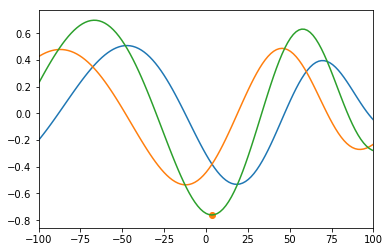

In [13]:
plt.plot(time,rh2)
plt.plot(time,rh1)
plt.plot(time,rh)
plt.scatter(time[3870],rh[3870])
plt.scatter(time[895],rh[895])
plt.xlim(-100,100)

In [14]:
print(time[3870],rh[3870])

5001.4468251329 -0.0212304953305349


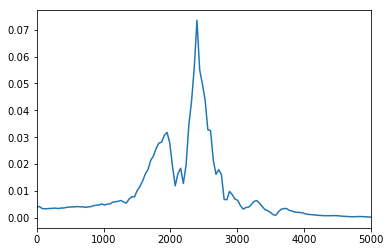

In [15]:
fq,fd,tim,dat=analyze(rh,time,2.4)
plt.plot(fq*Frequency,fd)
plt.xlim(0,5000)
plt.show()

Analysis and Plotting

For q=1 cases

data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.0
1.044660675955349


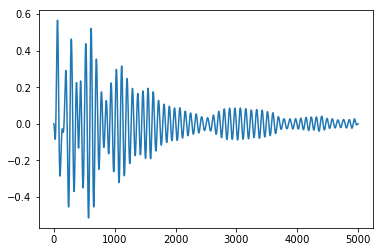

/home/jannis/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


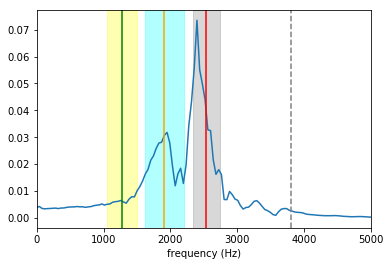

data/ALF2-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.0
1.066424440037752


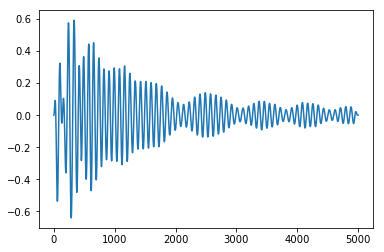

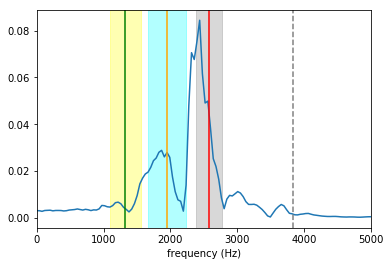

data/ALF2-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0
1.0881882041201552


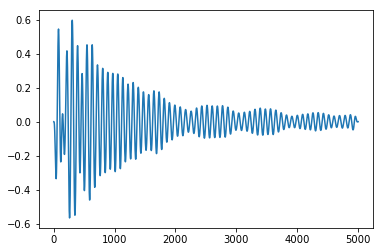

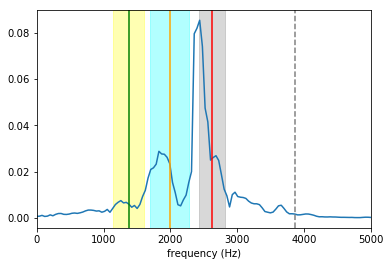

data/ALF2-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1099519682025583


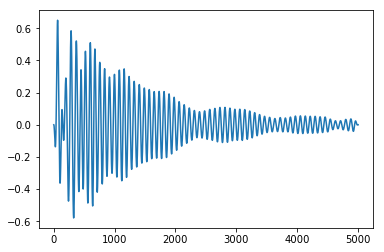

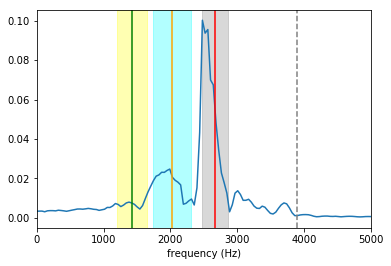

data/ALF2-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1317157322849614


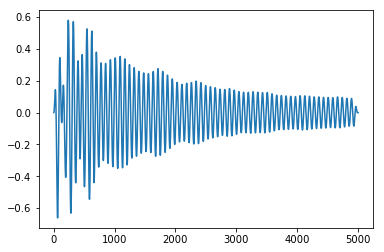

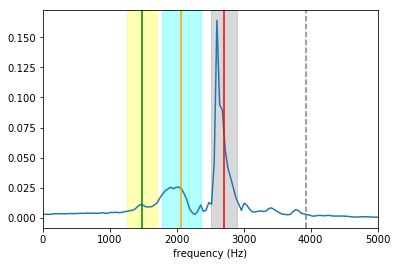

data/ALF2-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1534794963673645


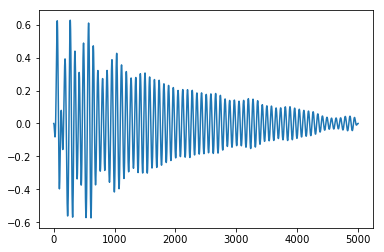

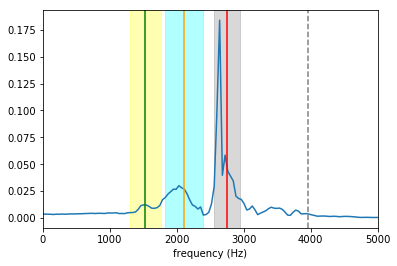

data/ALF2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1752432604497676


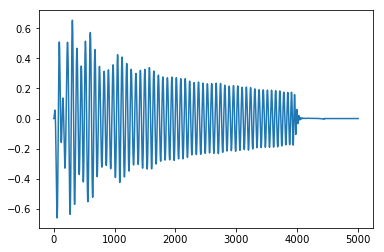

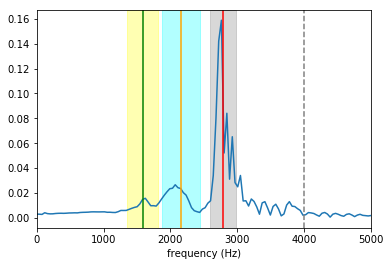

data/ALF2-q10-M1375.h_l2_m2.r500.t-1500_3500.dat
1.0
1.1970070245321707


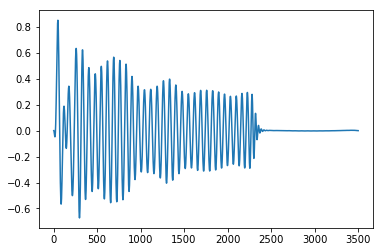

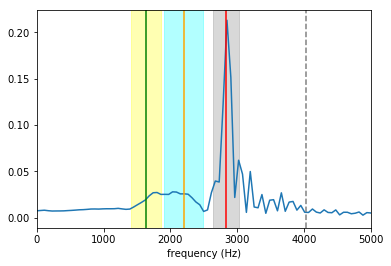

data/ALF2-q10-M1400.h_l2_m2.r500.t-1500_3000.dat
1.0
1.2187707886145738


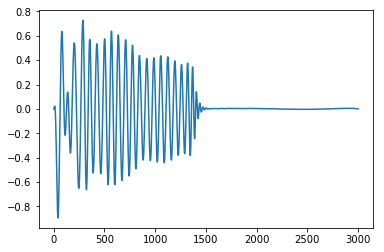

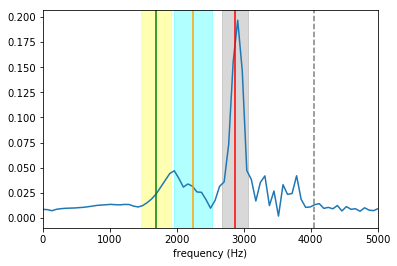

data/ALF2-q10-M1500.h_l2_m2.r500.t-1500_500.dat
1.0
1.3058258449441862


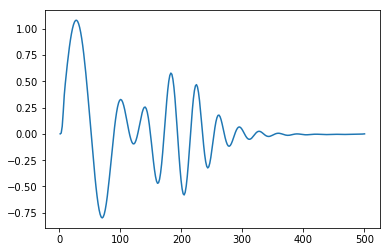

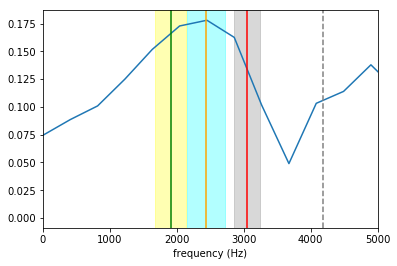

data/APR4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.0
1.044660675955349


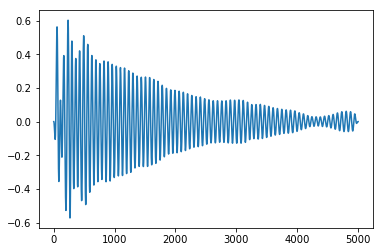

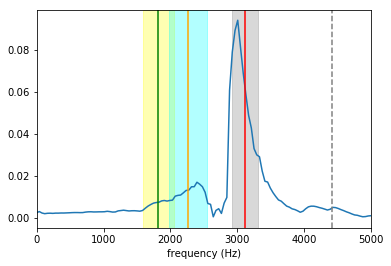

data/APR4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.0
1.066424440037752


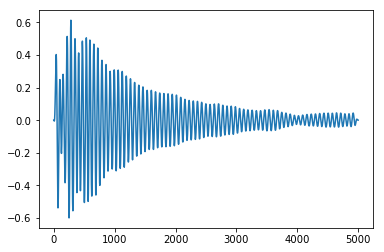

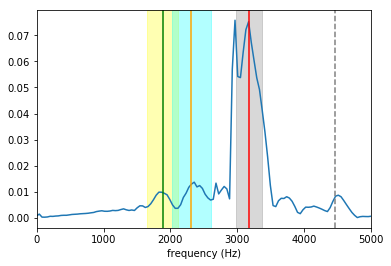

data/APR4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0
1.0881882041201552


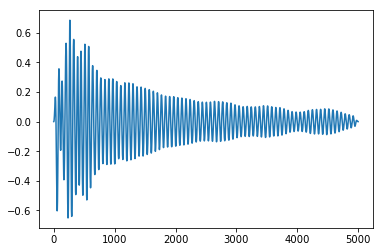

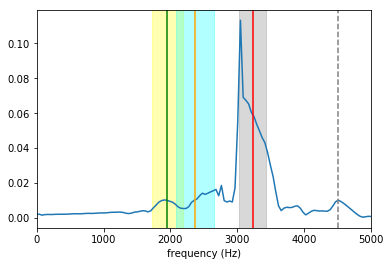

data/APR4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1099519682025583


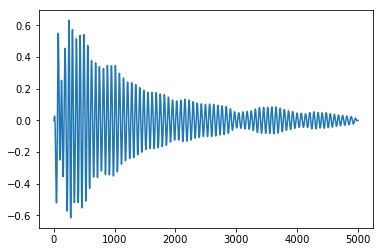

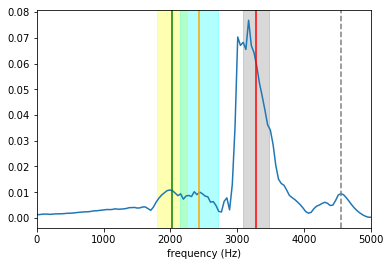

data/APR4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1317157322849614


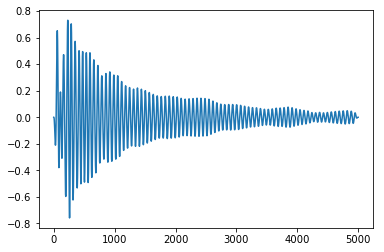

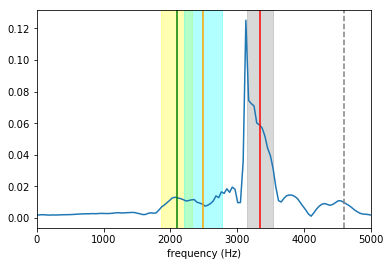

data/APR4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1534794963673645


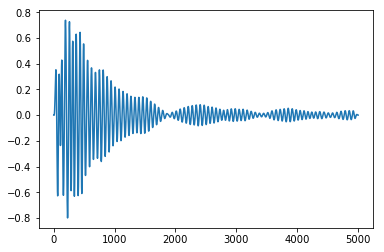

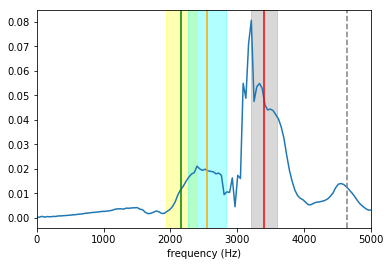

data/APR4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1752432604497676


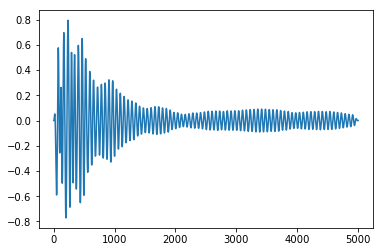

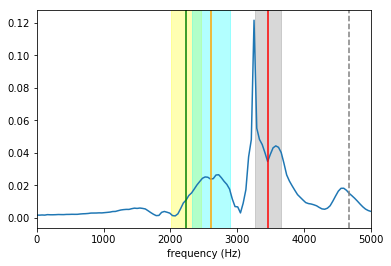

data/APR4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1970070245321707


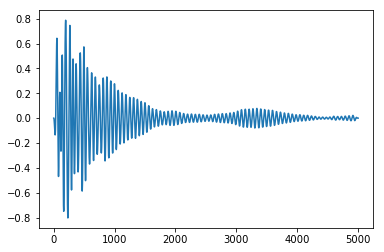

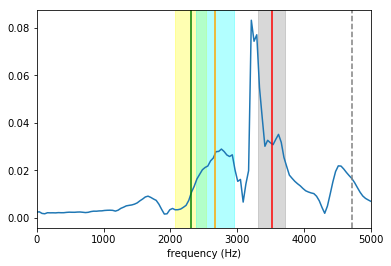

data/APR4-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.0
1.2187707886145738


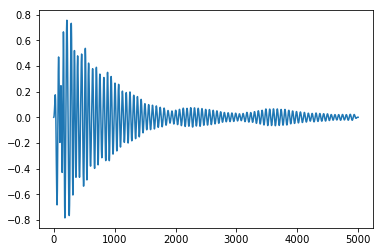

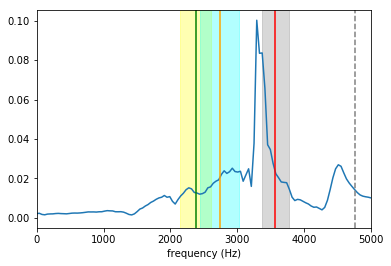

data/APR4-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.0
1.3058258449441862


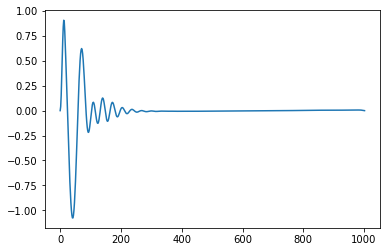

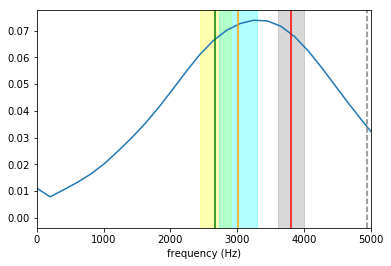

data/GAM2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1752432604497676
data/GAM2-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1970070245321707
data/GAM2-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.0
1.2187707886145738
data/GAM2-q10-M1425.h_l2_m2.r500.t-1500_5000.dat
1.0
1.2405345526969769
data/GAM2-q10-M1450.h_l2_m2.r500.t-1500_5000.dat
1.0
1.26229831677938
data/GNH3-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.0
1.044660675955349


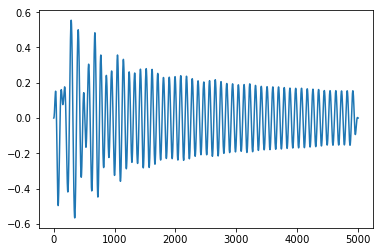

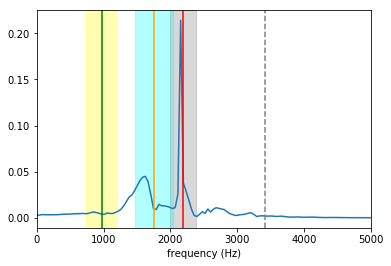

data/GNH3-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.0
1.066424440037752


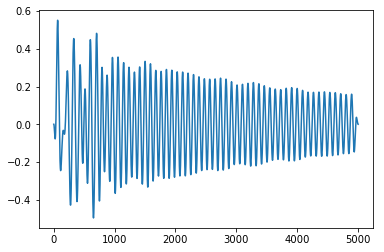

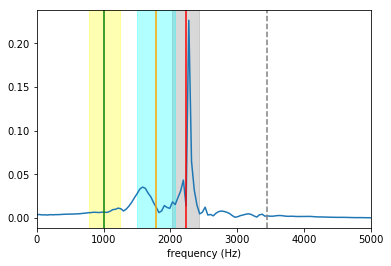

data/GNH3-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0
1.0881882041201552


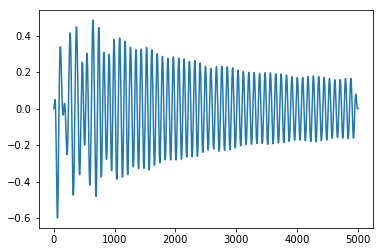

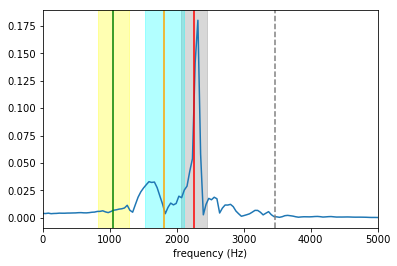

data/GNH3-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1099519682025583


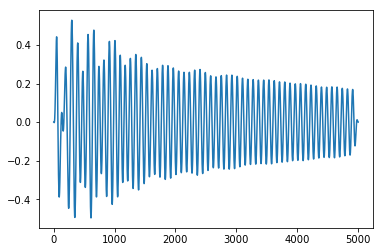

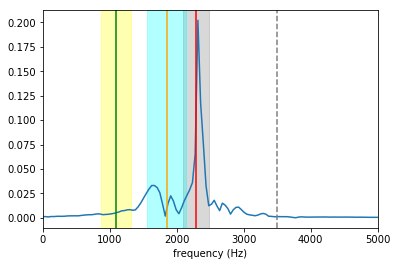

data/GNH3-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1317157322849614


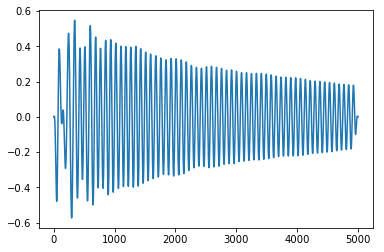

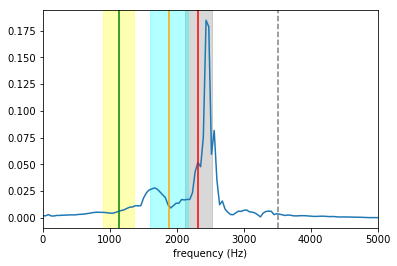

data/GNH3-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1534794963673645


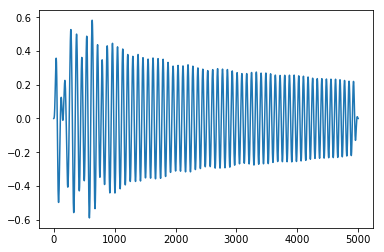

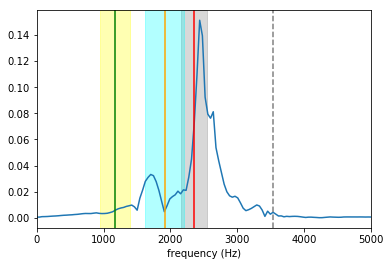

data/GNH3-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1752432604497676


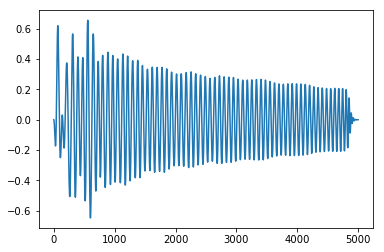

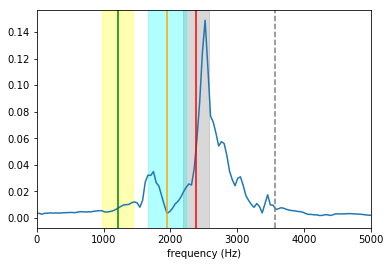

data/GNH3-q10-M1375.h_l2_m2.r500.t-1500_3000.dat
1.0
1.1970070245321707


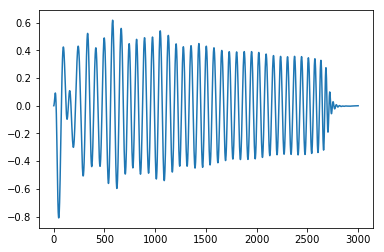

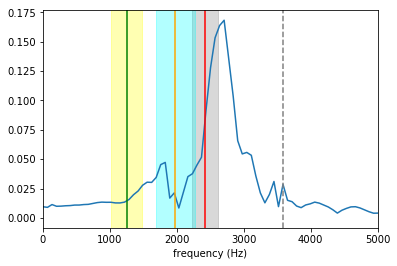

data/GNH3-q10-M1400.h_l2_m2.r500.t-1500_2500.dat
1.0
1.2187707886145738


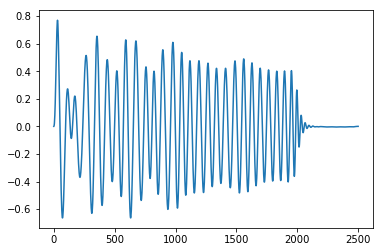

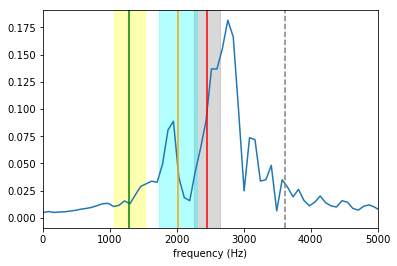

data/GNH3-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.0
1.3058258449441862


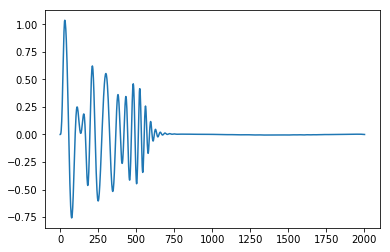

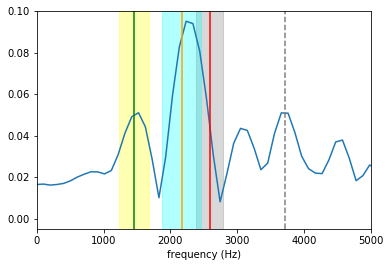

data/H4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.0
1.044660675955349


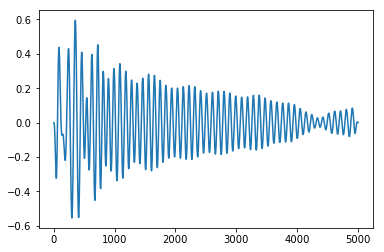

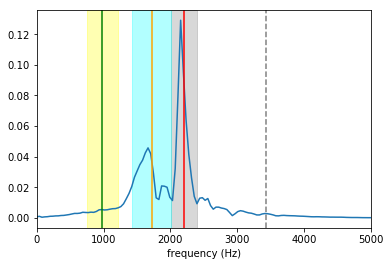

data/H4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.0
1.066424440037752


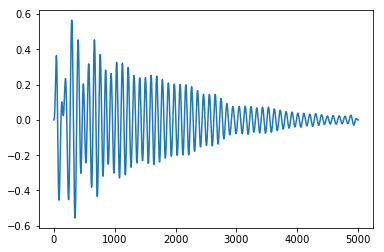

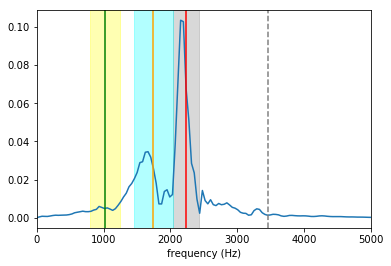

data/H4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0
1.0881882041201552


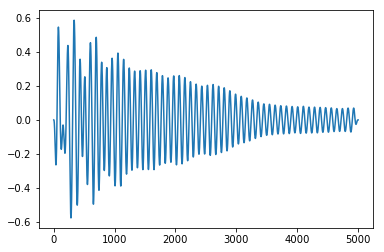

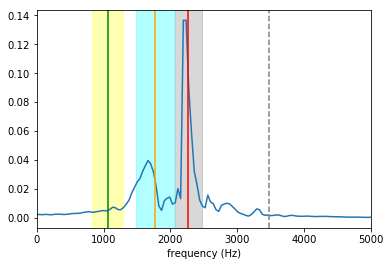

data/H4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1099519682025583


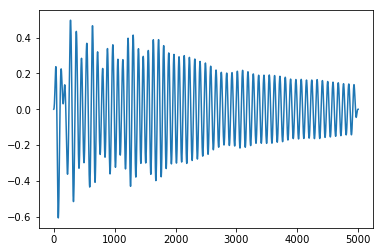

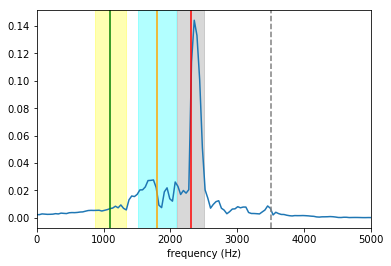

data/H4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1317157322849614


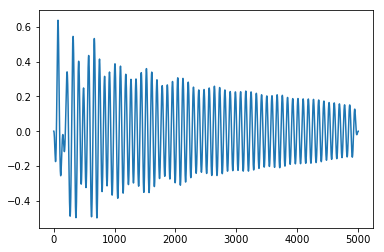

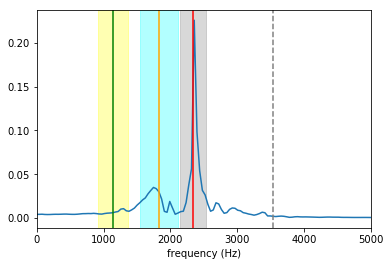

data/H4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1534794963673645


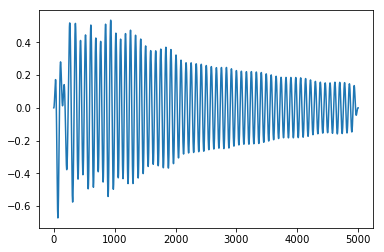

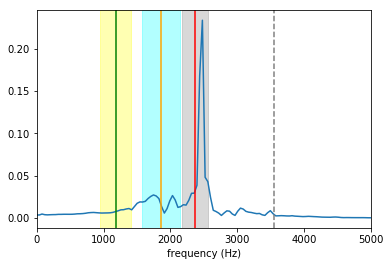

data/H4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1752432604497676


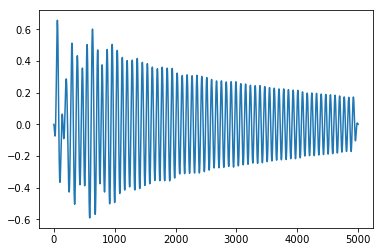

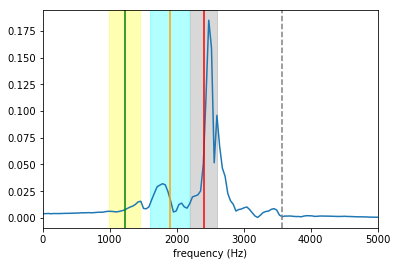

data/H4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1970070245321707


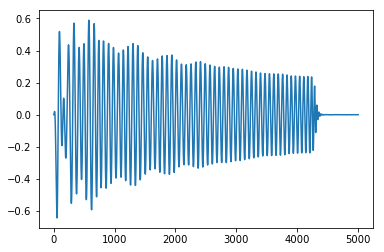

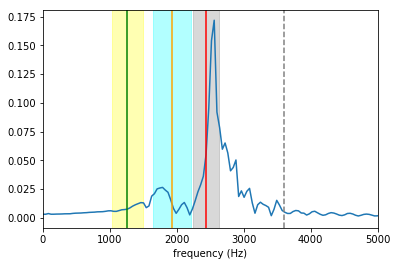

data/H4-q10-M1400.h_l2_m2.r500.t-1500_3500.dat
1.0
1.2187707886145738


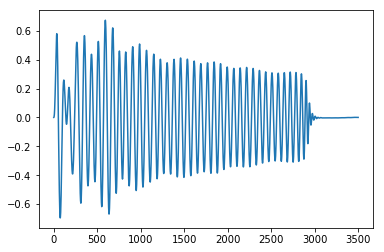

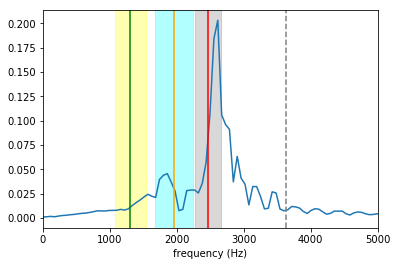

data/H4-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.0
1.3058258449441862


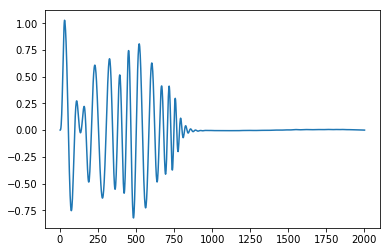

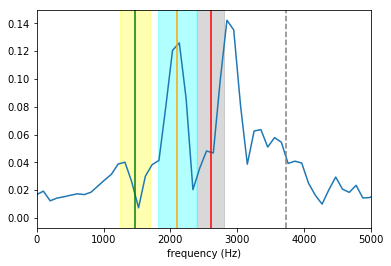

data/SLy-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.0
1.044660675955349


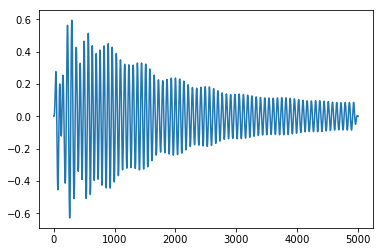

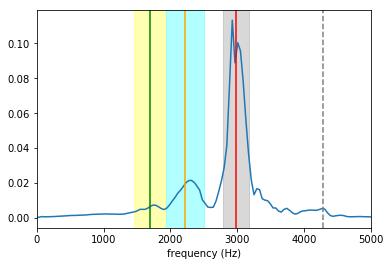

data/SLy-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.0
1.066424440037752


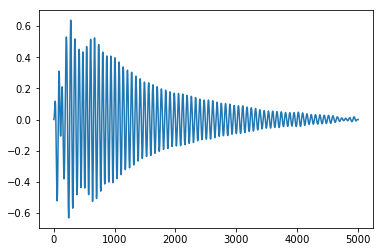

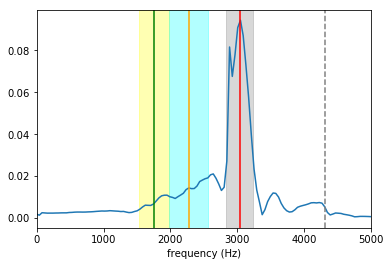

data/SLy-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0
1.0881882041201552


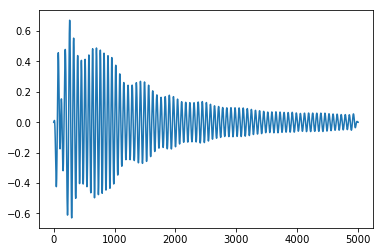

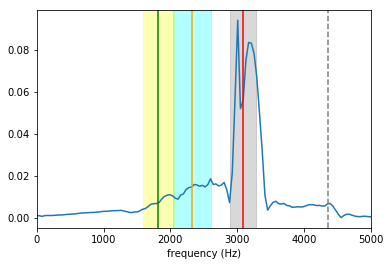

data/SLy-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1099519682025583


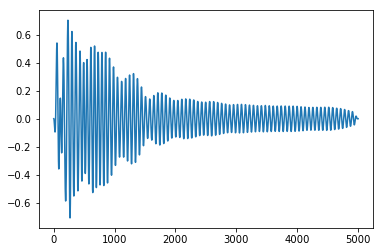

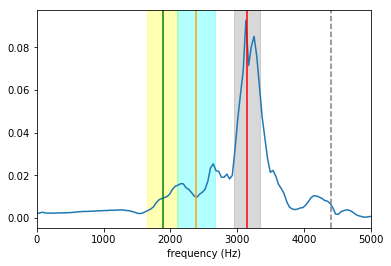

data/SLy-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1317157322849614


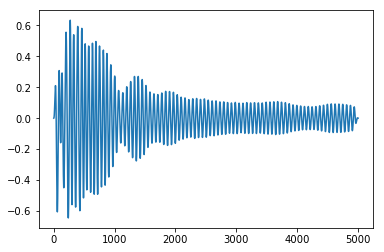

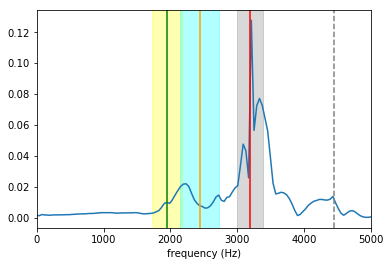

data/SLy-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1534794963673645


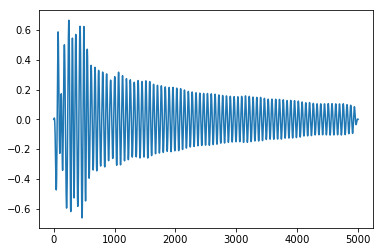

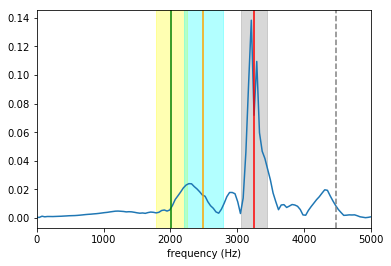

data/SLy-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.0
1.1752432604497676


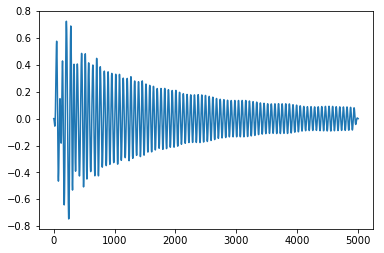

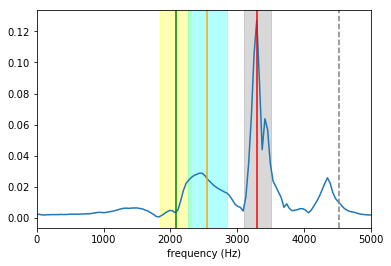

data/SLy-q10-M1375.h_l2_m2.r500.t-1500_2000.dat
1.0
1.1970070245321707


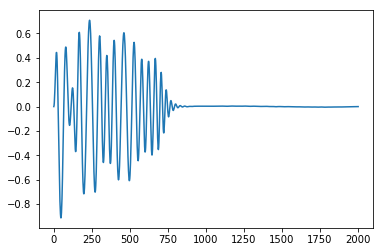

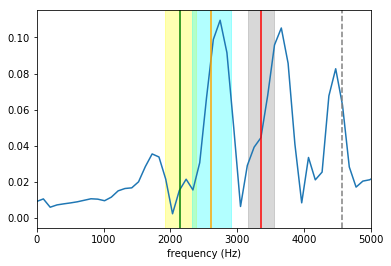

data/SLy-q10-M1400.h_l2_m2.r500.t-1500_1000.dat
1.0
1.2187707886145738


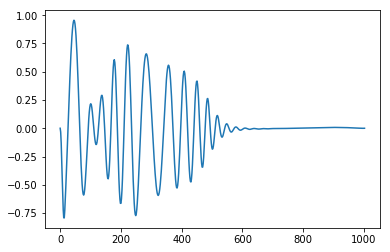

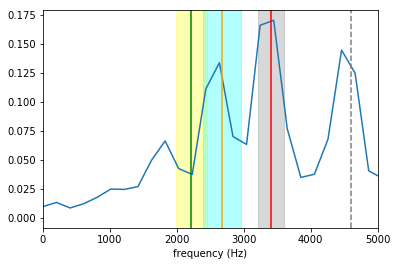

data/SLy-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.0
1.3058258449441862


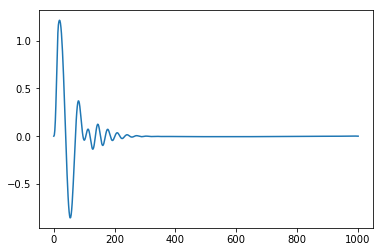

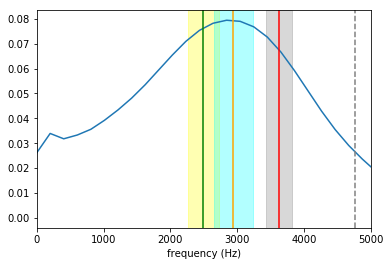

In [16]:
q='10'
for eos in EOS:
    
    
        for mas in MASS:
            for p in point:
                name='data/'+eos+'-q'+q+'-M'+mas+'.h_l2_m2.r500.t-1500_'+p+'.dat'
    
                try:
                    
                    f=open(name,'r')
                    print(name)
                    lines=f.readlines()[23:]

                    result1=[]
                    result2=[]
                    result3=[]
                    for x in lines:
                        for i in range(len(x.split(' '))):
                            if x.split(' ')[i]!='':
                                result1.append(x.split(' ')[i])
                                for j in range(i+1,len(x.split(' '))): 
                                    if x.split(' ')[j]!='':
                                        result2.append(x.split(' ')[j])
                                        for k in range(j+1,len(x.split(' '))):
                                            if x.split(' ')[k]!='':
                                                result3.append(x.split(' ')[k])
                                                break
                                        break
                                break
                    
                    time=[float(i) for i in result1]
                    rh1=[float(i) for i in result2]
                    rh2=[float(i) for i in result3]

                    rh=np.empty(len(rh1))
                    for i in range(len(rh1)):
                        rh[i]=rh1[i]+rh2[i]
                    
                    
                    
                    bn=open('data/BNS/'+eos+'-q'+q+'-M'+mas+'.bns')
                    blines=bn.readlines()
                    exec(blines[8])
                    exec(blines[9])
                    mass=mass1+mass2
                    q2=mass1/mass2
                    print(q2)
                    Mc=pow(q2/pow(1+q2,2),3/5)*mass
                    print(Mc)
                    m_r=np.load('tid_def/'+eos+'.npy')
                    mx=np.amax(m_r[0])
                    idx=np.where(m_r[0]==mx)
                    idx=idx[0][0]
                    cs=spline(m_r[0][1:idx],m_r[1][1:idx])
                    r68=np.zeros((1,2))
                    r68[0,0]=cs(1.6)*Length/1.0e5
                    r68[0,1]=cs(1.8)*Length/1.0e5
                    f_2=f20(Mc,r68[0,0])    
                    f_s=fspir(Mc,r68[0,1])
                    f_p=fpeak(Mc,r68[0,0])
                    f_0=2*f_p-f_2
                    
                    fq,fd,tim,dat=analyze(rh,time,mass)
                    
                    plt.plot(tim,dat)
                    plt.show()
                    
                    plt.plot(fq*Frequency,fd)
                    ax=plt.subplot()
                    ax.axvline(x=(f_p*Mc)*1000,color='r',label='peak')
                    ax.axvspan((f_p*Mc)*1000-196, (f_p*Mc)*1000+196, alpha=0.3, color='grey')
                    ax.axvline(x=(f_2*Mc)*1000,color='g',label='2-0')
                    ax.axvspan((f_2*Mc)*1000-229, (f_2*Mc)*1000+229, alpha=0.3, color='yellow')
                    ax.axvline((f_s*Mc)*1000,color='orange',label='spiral') 
                    ax.axvspan((f_s*Mc)*1000-286, (f_s*Mc)*1000+286, alpha=0.3, color='cyan')
                    ax.axvline((f_0*Mc)*1000,linestyle="--",color='grey',label='2+0') 
                    plt.xlim(0,5000)
                    plt.xlabel('frequency (Hz)')
                    plt.show()
                    
                except OSError:
                    pass



data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


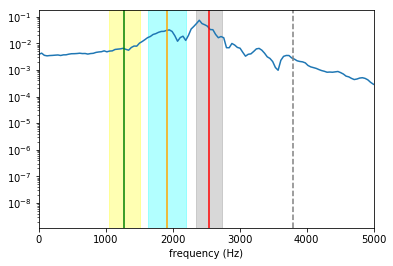

data/ALF2-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


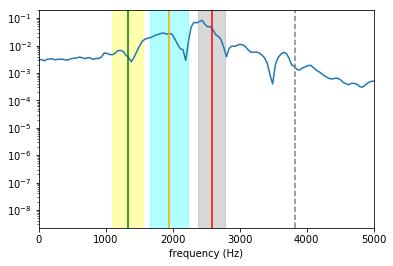

data/ALF2-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


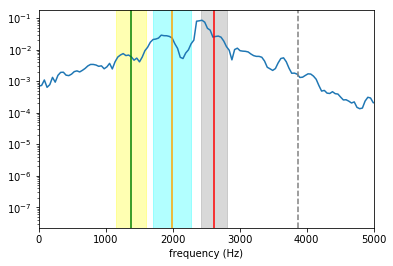

data/ALF2-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


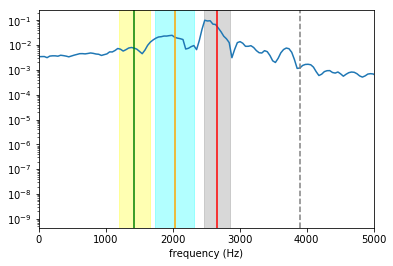

data/ALF2-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


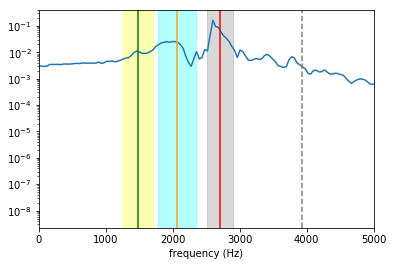

data/ALF2-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


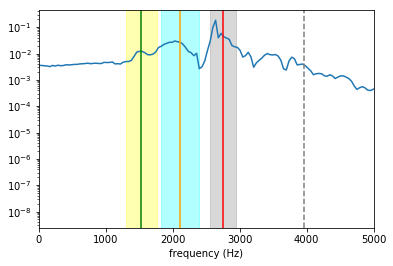

data/ALF2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


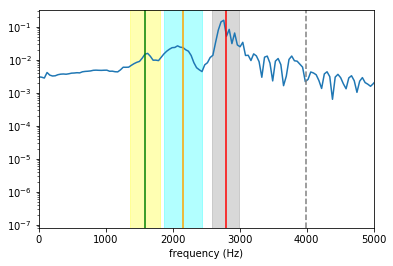

data/ALF2-q10-M1375.h_l2_m2.r500.t-1500_3500.dat
1.1970070245321707


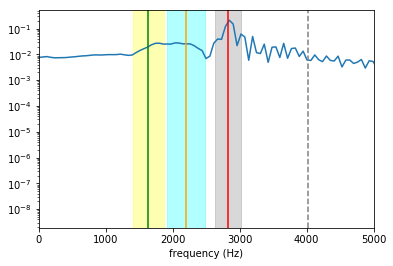

data/ALF2-q10-M1400.h_l2_m2.r500.t-1500_3000.dat
1.2187707886145738


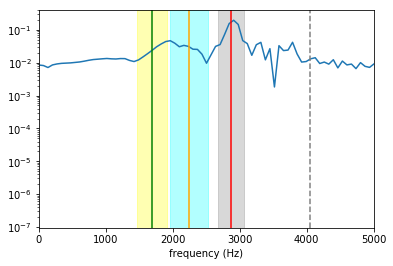

data/ALF2-q10-M1500.h_l2_m2.r500.t-1500_500.dat
1.3058258449441862


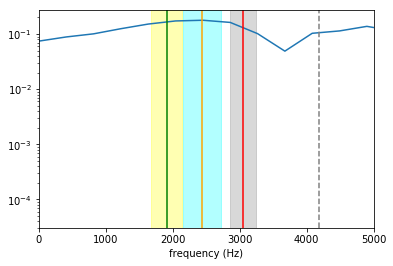

data/APR4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


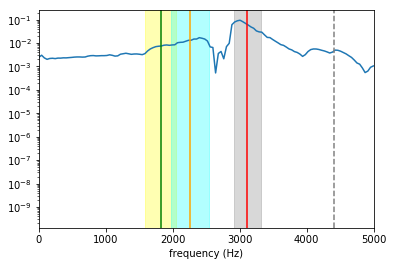

data/APR4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


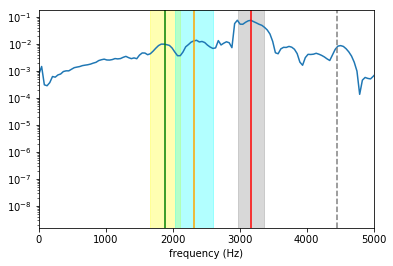

data/APR4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


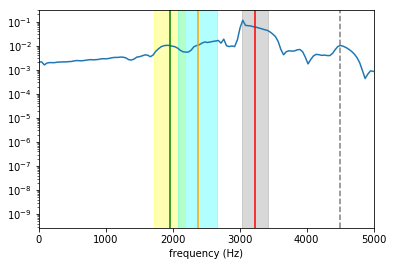

data/APR4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


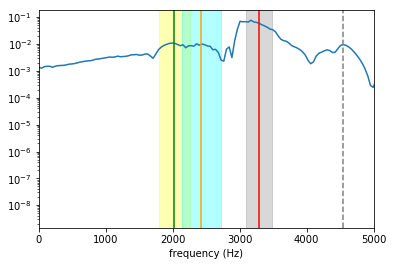

data/APR4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


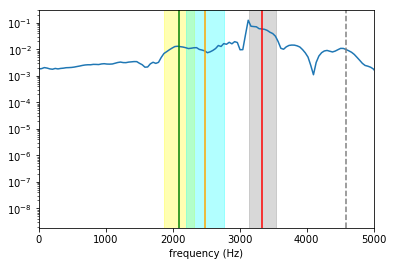

data/APR4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


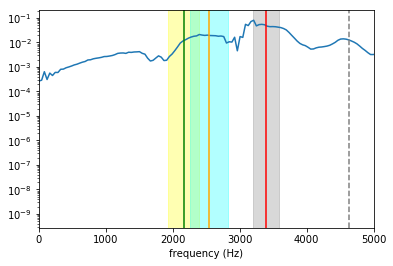

data/APR4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


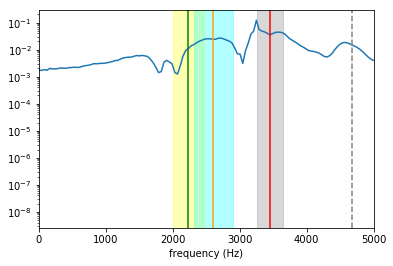

data/APR4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707


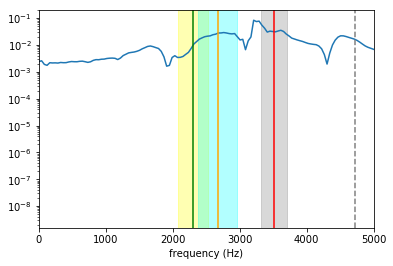

data/APR4-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.2187707886145738


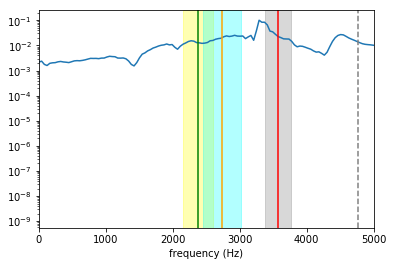

data/APR4-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.3058258449441862


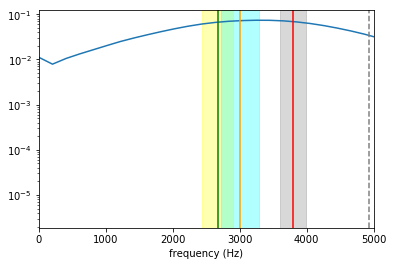

data/GAM2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676
data/GAM2-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707
data/GAM2-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.2187707886145738
data/GAM2-q10-M1425.h_l2_m2.r500.t-1500_5000.dat
1.2405345526969769
data/GAM2-q10-M1450.h_l2_m2.r500.t-1500_5000.dat
1.26229831677938
data/GNH3-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


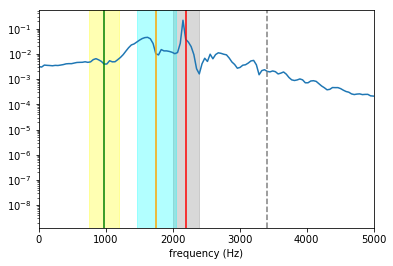

data/GNH3-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


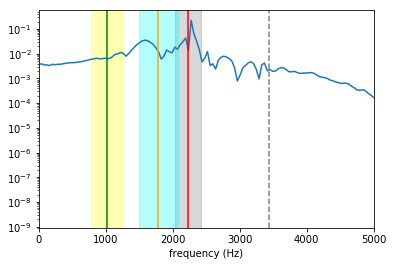

data/GNH3-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


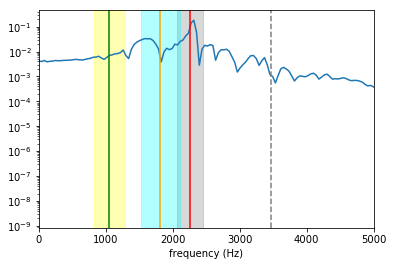

data/GNH3-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


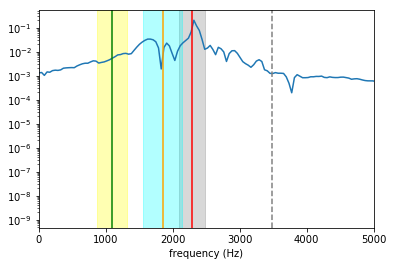

data/GNH3-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


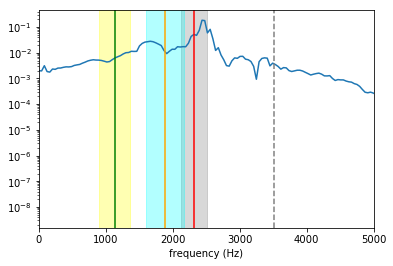

data/GNH3-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


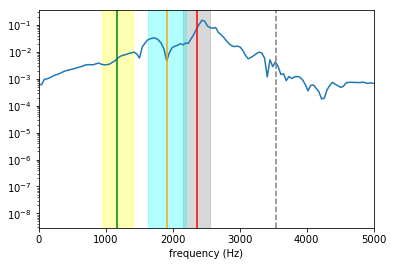

data/GNH3-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


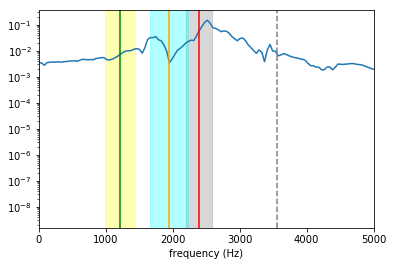

data/GNH3-q10-M1375.h_l2_m2.r500.t-1500_3000.dat
1.1970070245321707


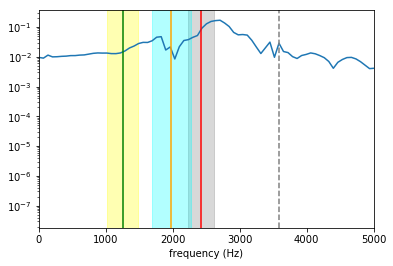

data/GNH3-q10-M1400.h_l2_m2.r500.t-1500_2500.dat
1.2187707886145738


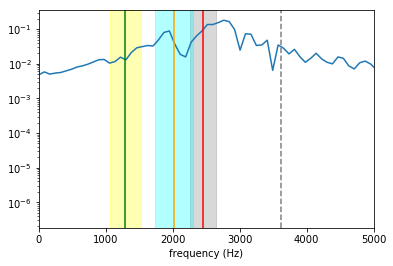

data/GNH3-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.3058258449441862


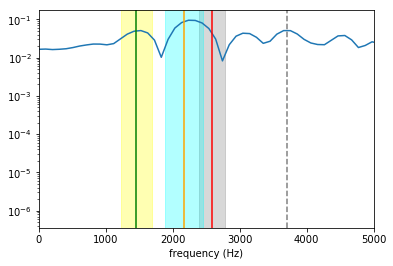

data/H4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


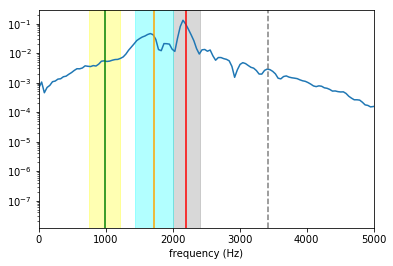

data/H4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


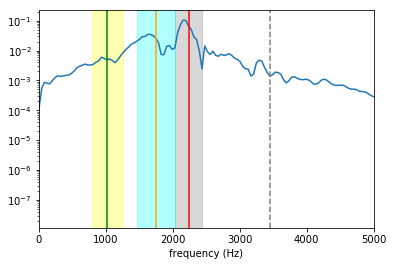

data/H4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


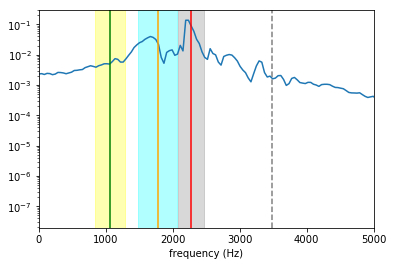

data/H4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


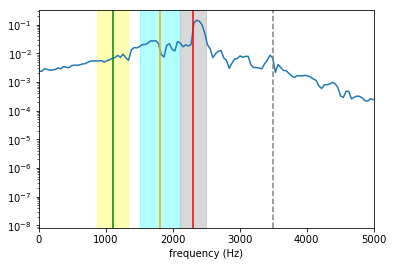

data/H4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


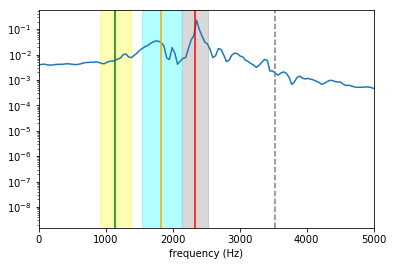

data/H4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


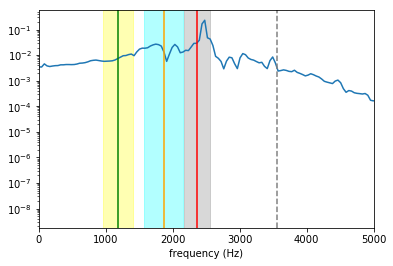

data/H4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


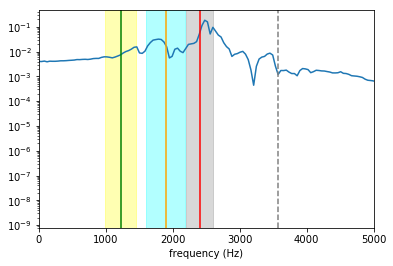

data/H4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707


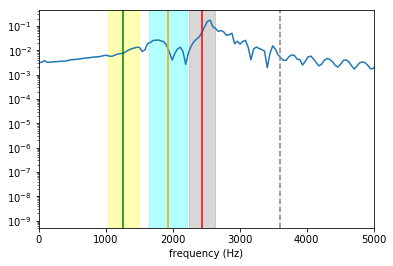

data/H4-q10-M1400.h_l2_m2.r500.t-1500_3500.dat
1.2187707886145738


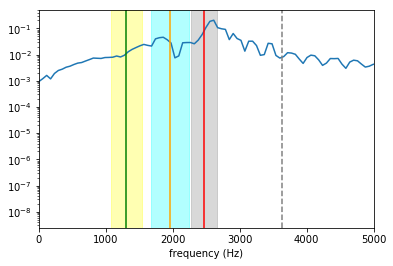

data/H4-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.3058258449441862


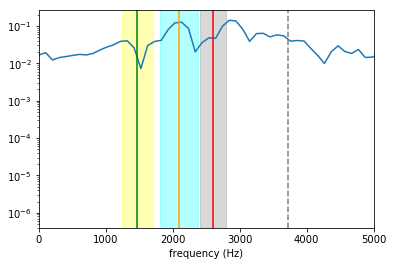

data/SLy-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


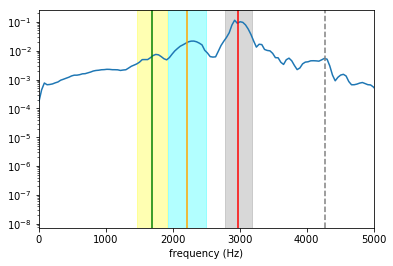

data/SLy-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


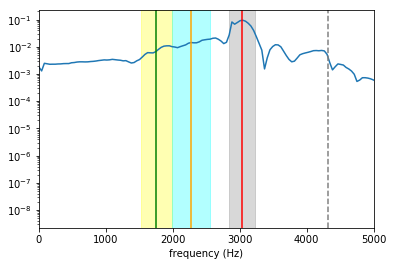

data/SLy-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


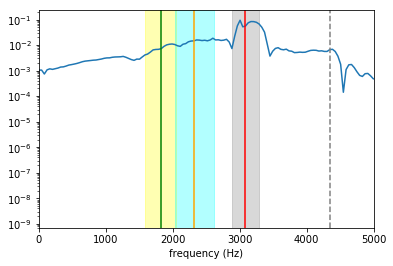

data/SLy-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


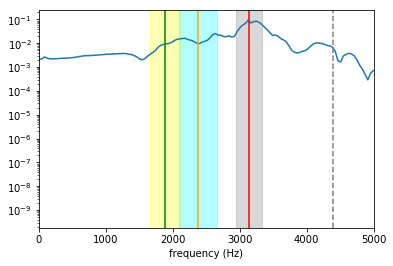

data/SLy-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


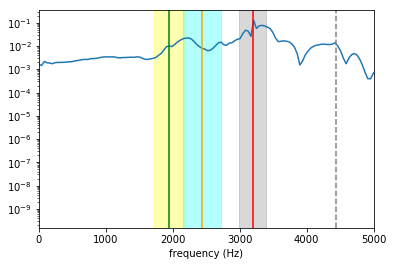

data/SLy-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


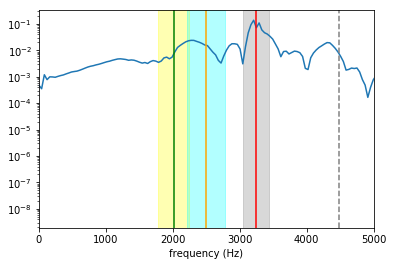

data/SLy-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


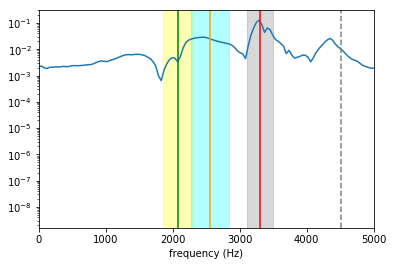

data/SLy-q10-M1375.h_l2_m2.r500.t-1500_2000.dat
1.1970070245321707


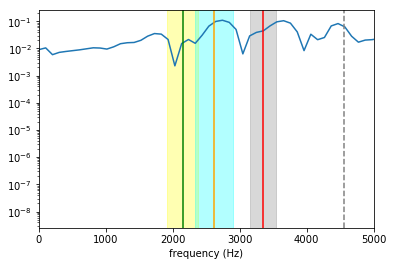

data/SLy-q10-M1400.h_l2_m2.r500.t-1500_1000.dat
1.2187707886145738


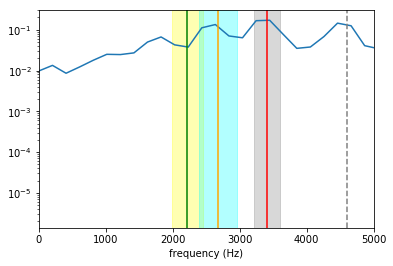

data/SLy-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.3058258449441862


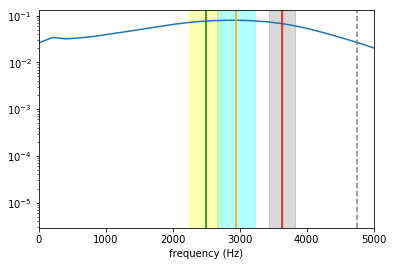

In [17]:
q='10'
for eos in EOS:
    
   
        for mas in MASS:
            for p in point:
                name='data/'+eos+'-q'+q+'-M'+mas+'.h_l2_m2.r500.t-1500_'+p+'.dat'
    
                try:
                    
                    f=open(name,'r')
                    print(name)
                    lines=f.readlines()[23:]

                    result1=[]
                    result2=[]
                    result3=[]
                    for x in lines:
                        for i in range(len(x.split(' '))):
                            if x.split(' ')[i]!='':
                                result1.append(x.split(' ')[i])
                                for j in range(i+1,len(x.split(' '))): 
                                    if x.split(' ')[j]!='':
                                        result2.append(x.split(' ')[j])
                                        for k in range(j+1,len(x.split(' '))):
                                            if x.split(' ')[k]!='':
                                                result3.append(x.split(' ')[k])
                                                break
                                        break
                                break
                    
                    time=[float(i) for i in result1]
                    rh1=[float(i) for i in result2]
                    rh2=[float(i) for i in result3]

                    rh=np.empty(len(rh1))
                    for i in range(len(rh1)):
                        rh[i]=rh1[i]+rh2[i]
                    
                    
                    
                    bn=open('data/BNS/'+eos+'-q'+q+'-M'+mas+'.bns')
                    blines=bn.readlines()
                    exec(blines[8])
                    exec(blines[9])
                    mass=mass1+mass2
                    q2=mass1/mass2
                    Mc=pow(q2/pow(1+q2,2),3/5)*mass
                    print(Mc)
                    m_r=np.load('tid_def/'+eos+'.npy')
                    mx=np.amax(m_r[0])
                    idx=np.where(m_r[0]==mx)
                    idx=idx[0][0]
                    cs=spline(m_r[0][1:idx],m_r[1][1:idx])
                    r68=np.zeros((1,2))
                    r68[0,0]=cs(1.6)*Length/1.0e5
                    r68[0,1]=cs(1.8)*Length/1.0e5
                    f_2=f20(Mc,r68[0,0])    
                    f_s=fspir(Mc,r68[0,1])
                    f_p=fpeak(Mc,r68[0,0])
                    f_0=2*f_p-f_2
                    
                    fq,fd,tim,dat=analyze(rh,time,mass)
                    
                    
                    plt.plot(fq*Frequency,fd)
                    plt.yscale('log')
                    ax=plt.subplot()
                    ax.axvline(x=(f_p*Mc)*1000,color='r',label='peak')
                    ax.axvspan((f_p*Mc)*1000-196, (f_p*Mc)*1000+196, alpha=0.3, color='grey')
                    ax.axvline(x=(f_2*Mc)*1000,color='g',label='2-0')
                    ax.axvspan((f_2*Mc)*1000-229, (f_2*Mc)*1000+229, alpha=0.3, color='yellow')
                    ax.axvline((f_s*Mc)*1000,color='orange',label='spiral') 
                    ax.axvspan((f_s*Mc)*1000-286, (f_s*Mc)*1000+286, alpha=0.3, color='cyan')
                    ax.axvline((f_0*Mc)*1000,linestyle="--",color='grey',label='2+0') 
                    plt.xlim(0,5000)
                    plt.xlabel('frequency (Hz)')
                    plt.show()
                    
                except OSError:
                    pass



For all cases

data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


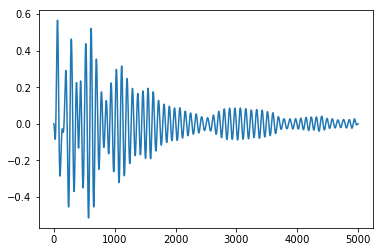

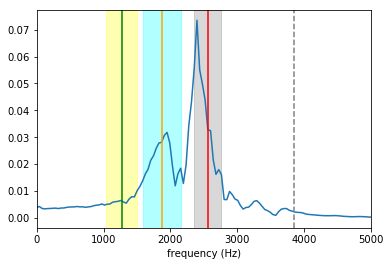

data/ALF2-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


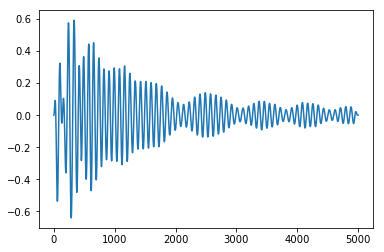

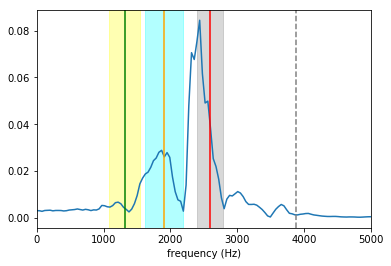

data/ALF2-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


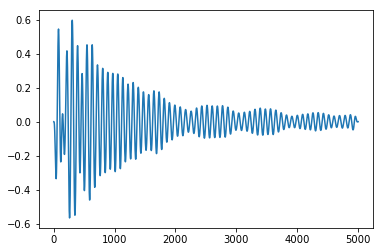

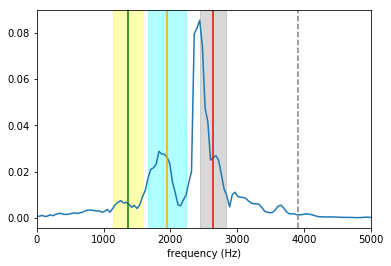

data/ALF2-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


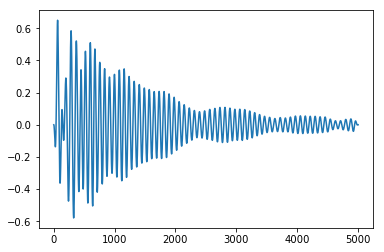

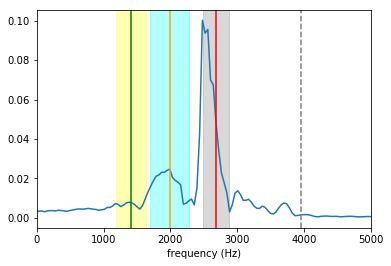

data/ALF2-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


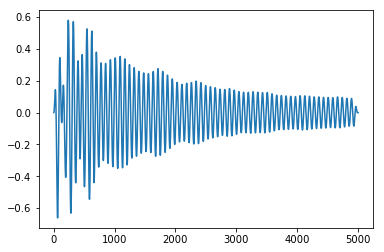

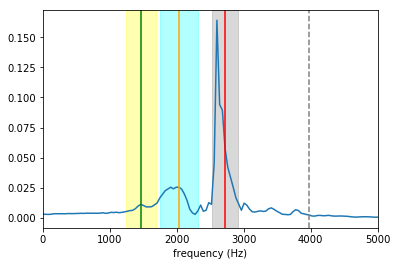

data/ALF2-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


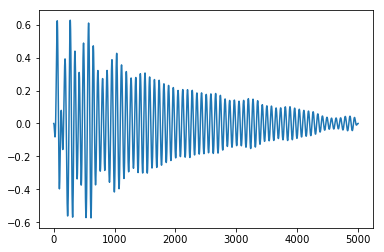

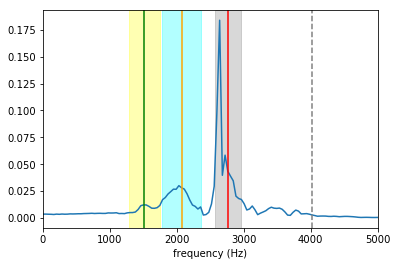

data/ALF2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


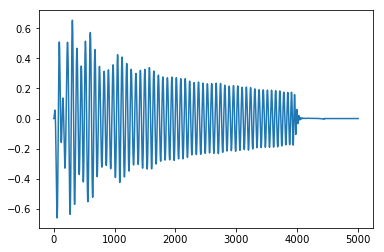

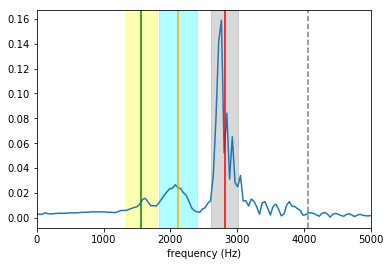

data/ALF2-q10-M1375.h_l2_m2.r500.t-1500_3500.dat
1.1970070245321707


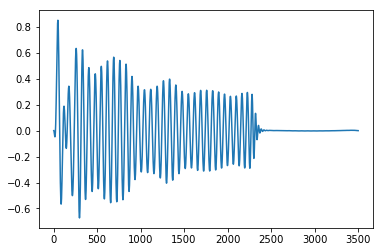

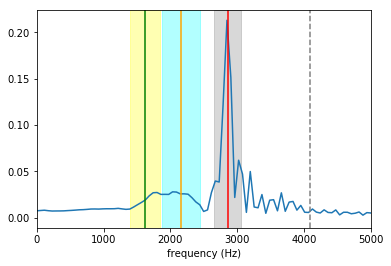

data/ALF2-q10-M1400.h_l2_m2.r500.t-1500_3000.dat
1.2187707886145738


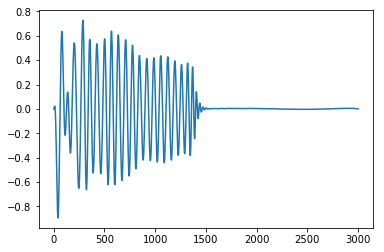

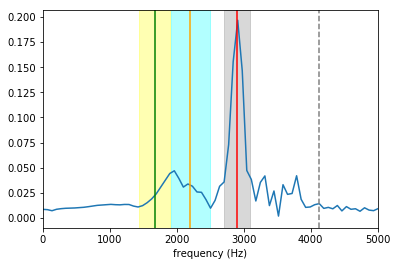

data/ALF2-q10-M1500.h_l2_m2.r500.t-1500_500.dat
1.3058258449441862


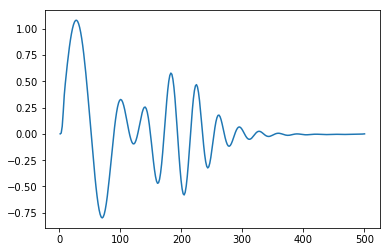

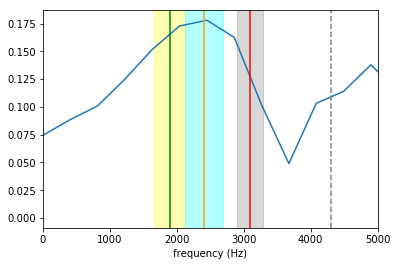

data/APR4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


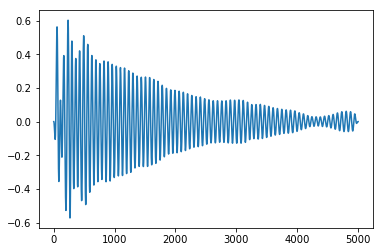

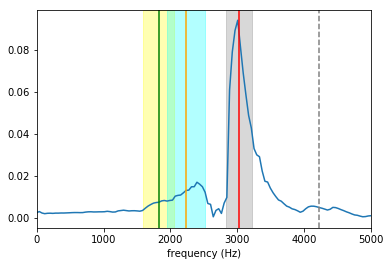

data/APR4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


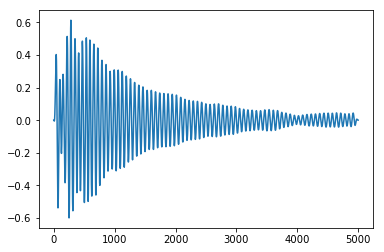

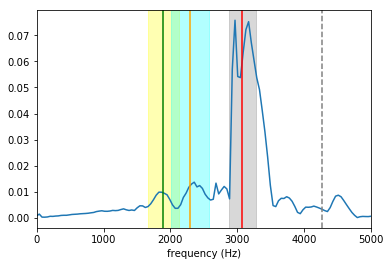

data/APR4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


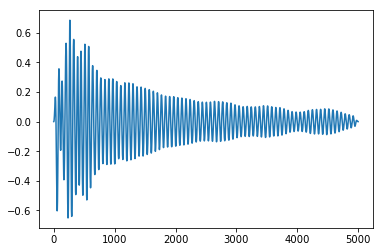

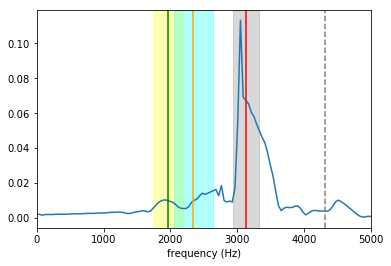

data/APR4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


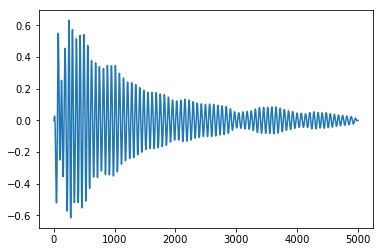

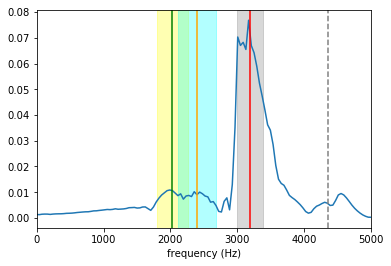

data/APR4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


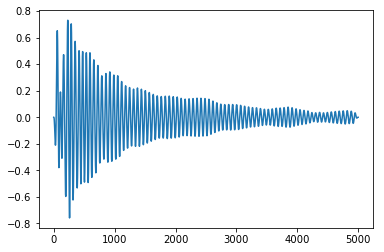

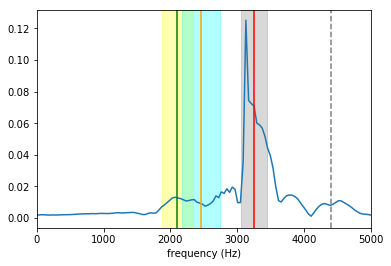

data/APR4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


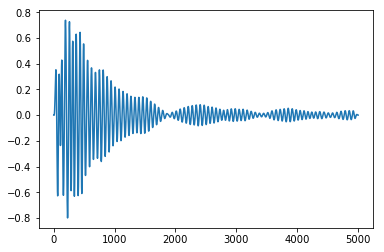

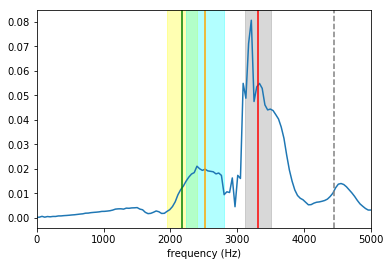

data/APR4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


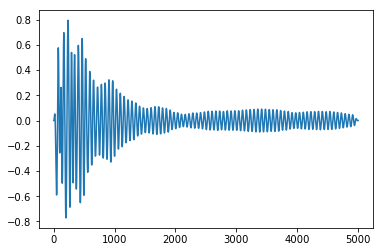

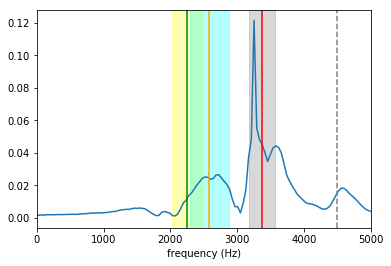

data/APR4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707


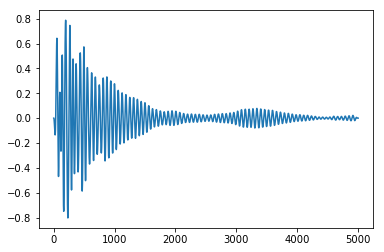

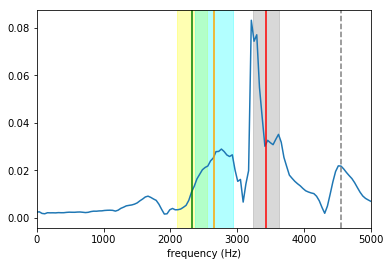

data/APR4-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.2187707886145738


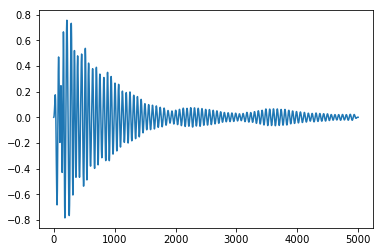

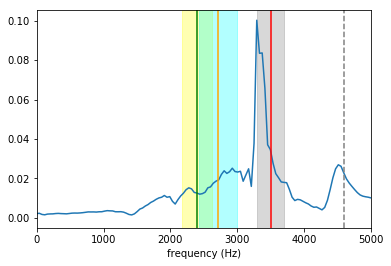

data/APR4-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.3058258449441862


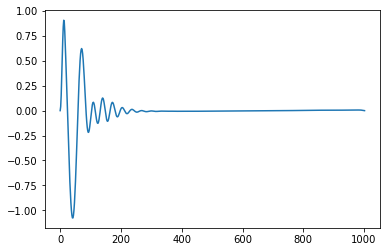

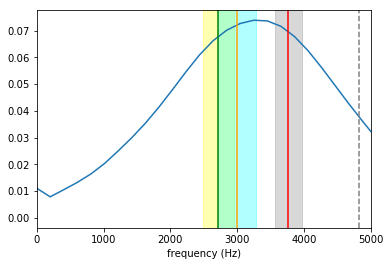

data/GAM2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676
data/GAM2-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707
data/GAM2-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.2187707886145738
data/GAM2-q10-M1425.h_l2_m2.r500.t-1500_5000.dat
1.2405345526969769
data/GAM2-q10-M1450.h_l2_m2.r500.t-1500_5000.dat
1.26229831677938
data/GNH3-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


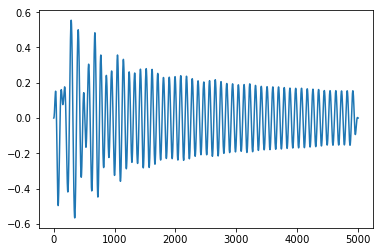

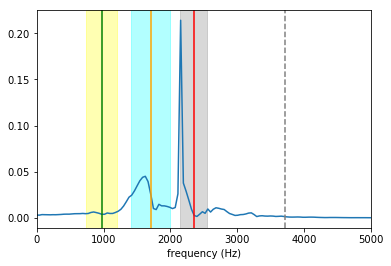

data/GNH3-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


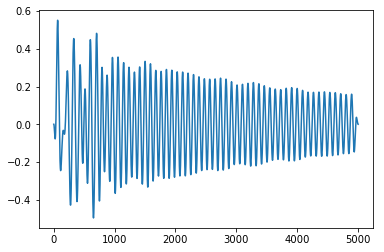

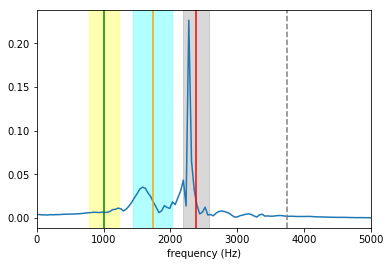

data/GNH3-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


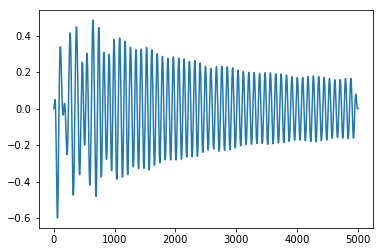

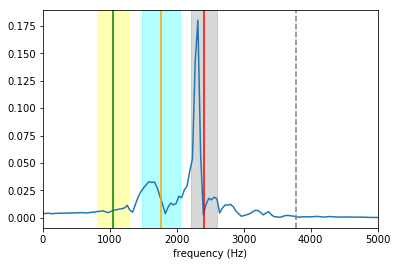

data/GNH3-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


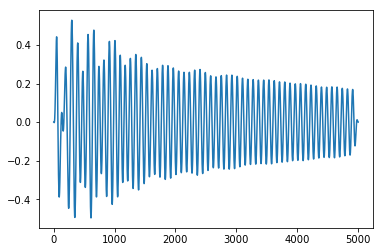

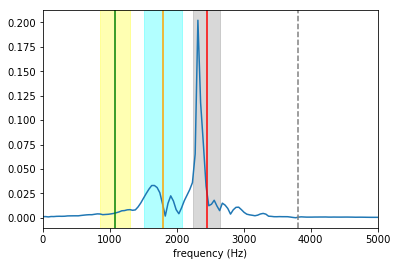

data/GNH3-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


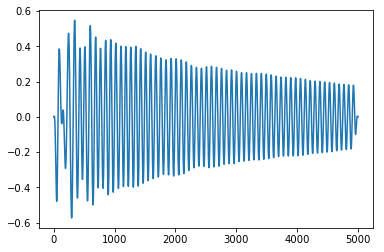

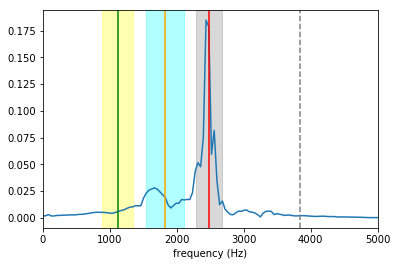

data/GNH3-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


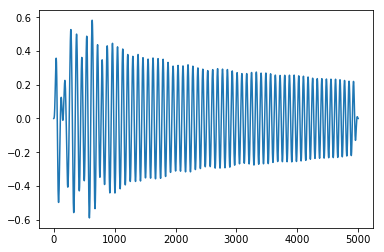

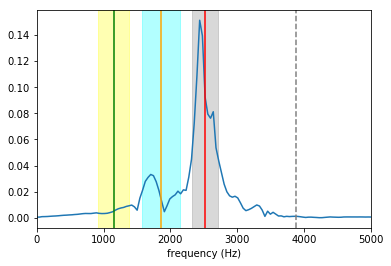

data/GNH3-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


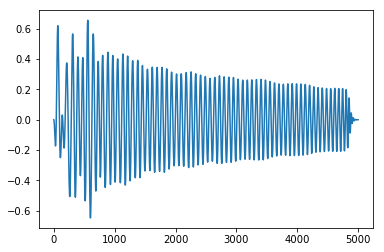

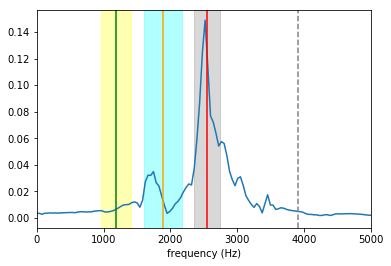

data/GNH3-q10-M1375.h_l2_m2.r500.t-1500_3000.dat
1.1970070245321707


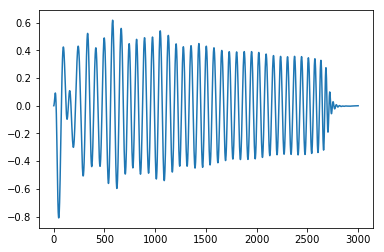

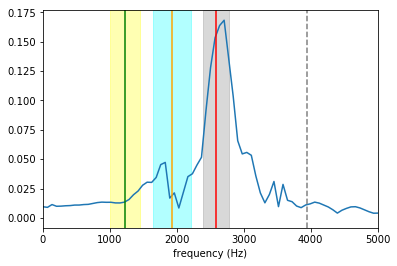

data/GNH3-q10-M1400.h_l2_m2.r500.t-1500_2500.dat
1.2187707886145738


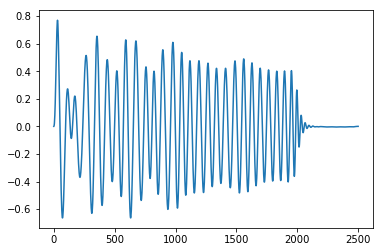

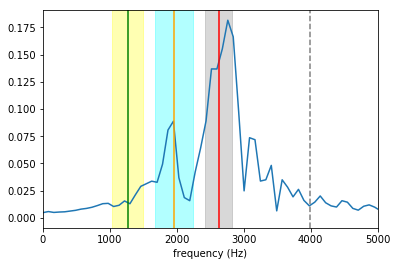

data/GNH3-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.3058258449441862


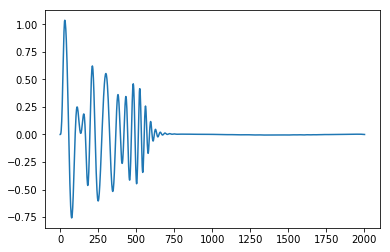

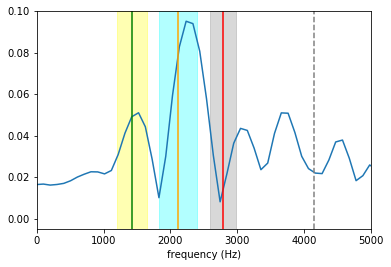

data/GNH3-q08-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1035385005165994


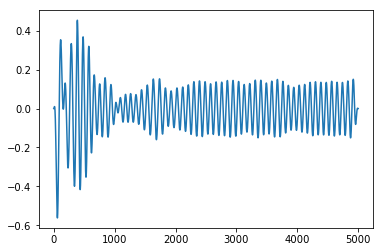

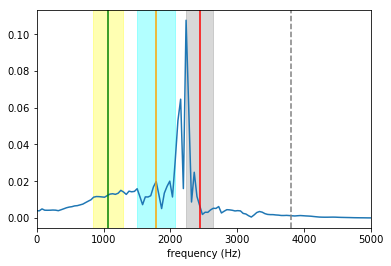

data/GNH3-q09-M1300.h_l2_m2.r500.t-1500_5000.dat
1.130710953476583


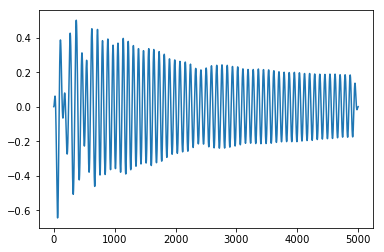

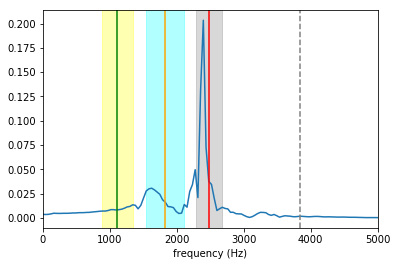

data/H4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


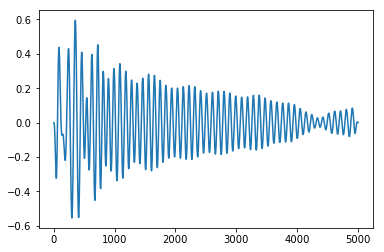

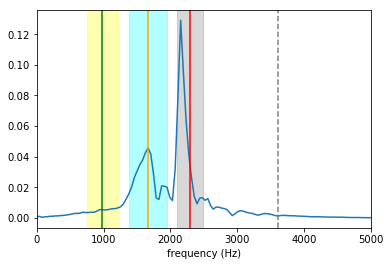

data/H4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


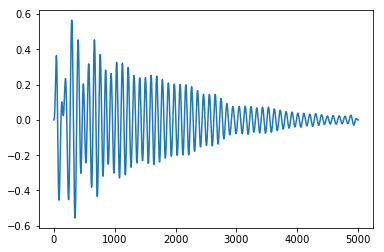

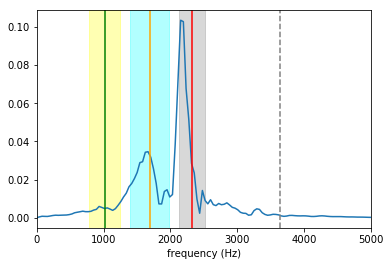

data/H4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


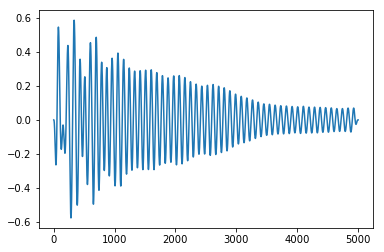

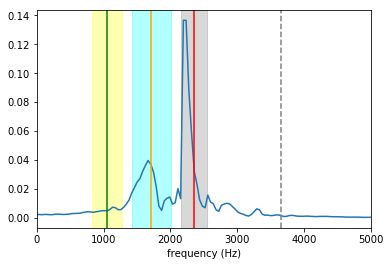

data/H4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


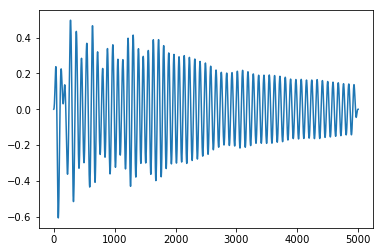

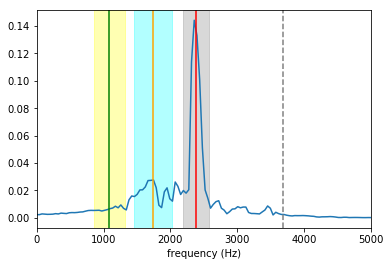

data/H4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


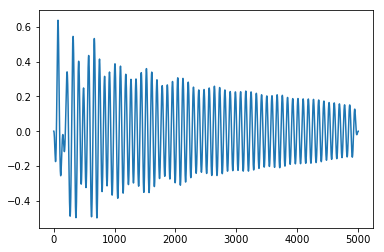

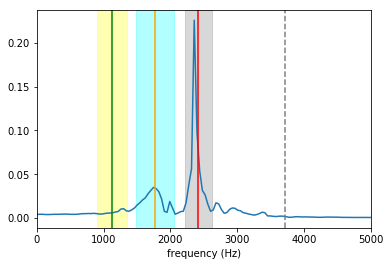

data/H4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


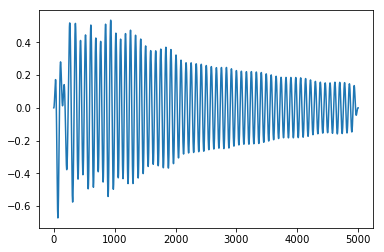

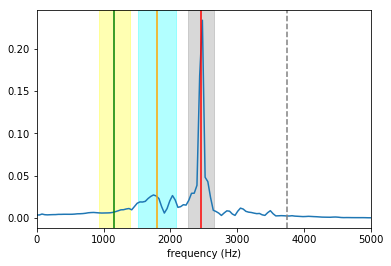

data/H4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


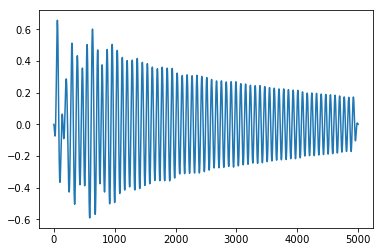

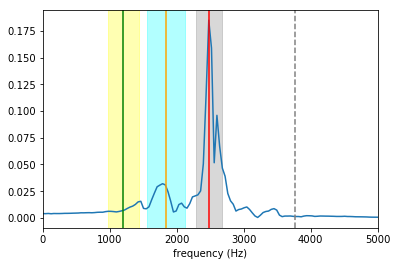

data/H4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707


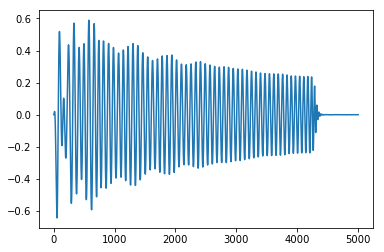

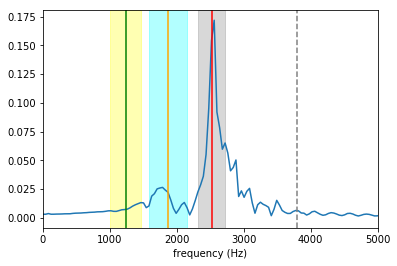

data/H4-q10-M1400.h_l2_m2.r500.t-1500_3500.dat
1.2187707886145738


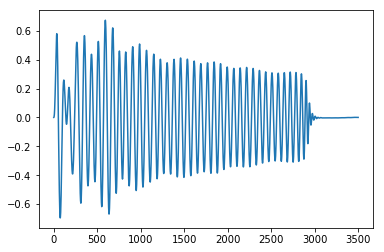

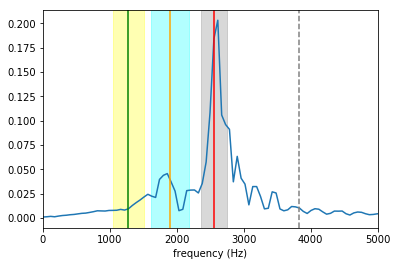

data/H4-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.3058258449441862


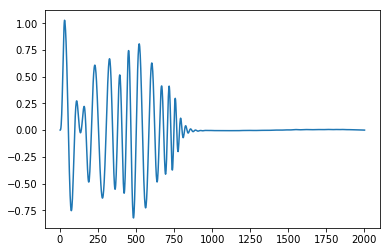

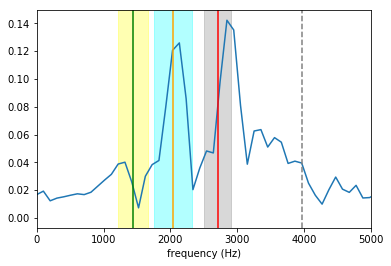

data/SLy-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


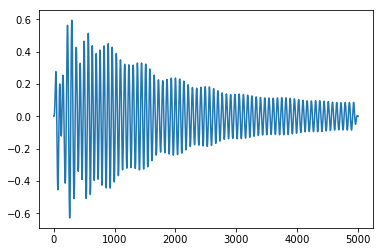

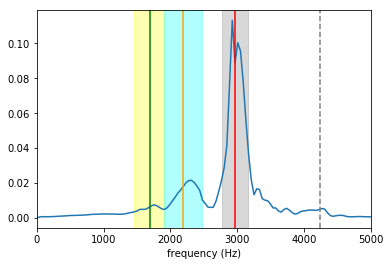

data/SLy-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


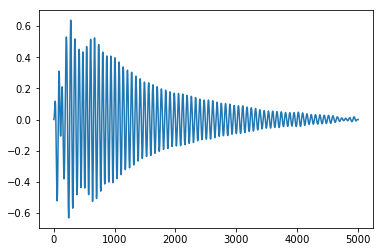

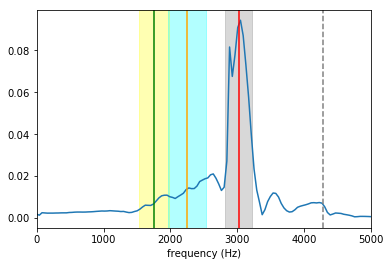

data/SLy-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


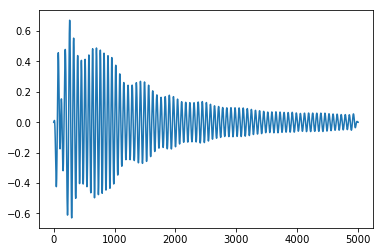

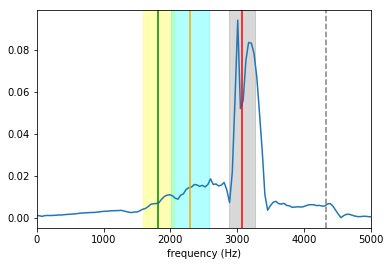

data/SLy-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


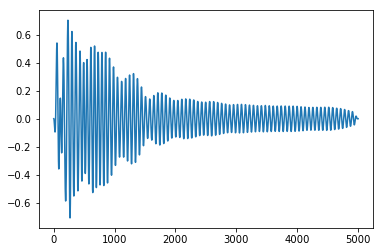

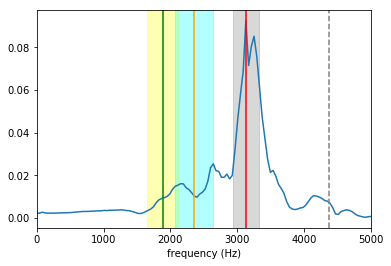

data/SLy-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


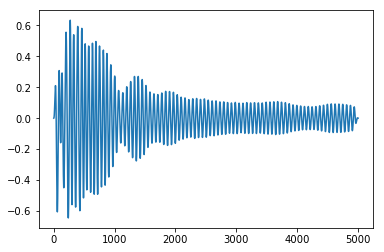

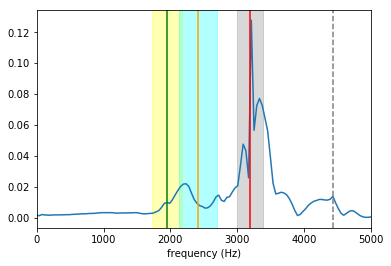

data/SLy-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


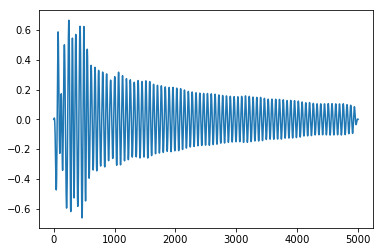

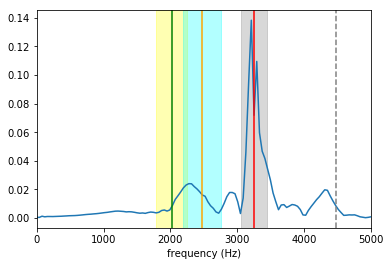

data/SLy-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


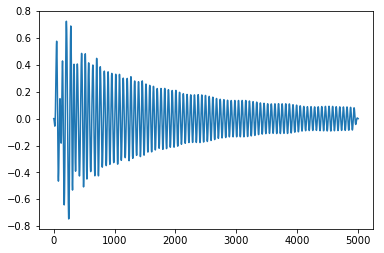

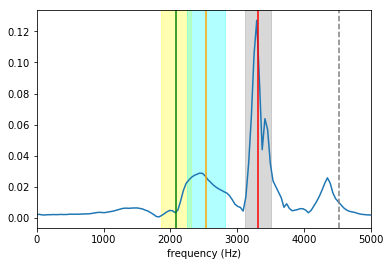

data/SLy-q10-M1375.h_l2_m2.r500.t-1500_2000.dat
1.1970070245321707


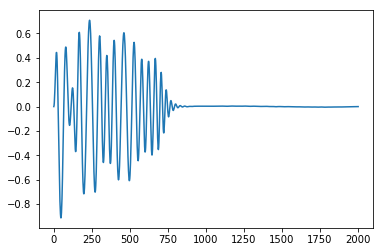

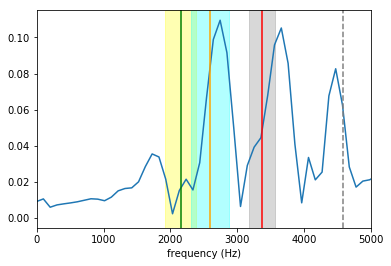

data/SLy-q10-M1400.h_l2_m2.r500.t-1500_1000.dat
1.2187707886145738


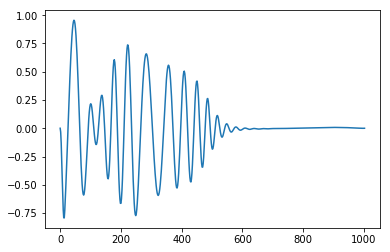

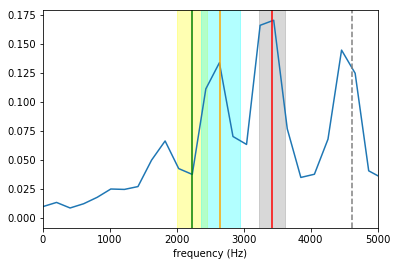

data/SLy-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.3058258449441862


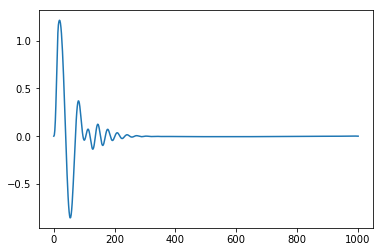

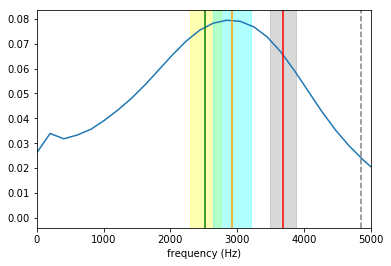

data/SLy-q08-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1035385005165994


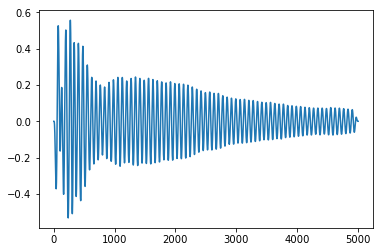

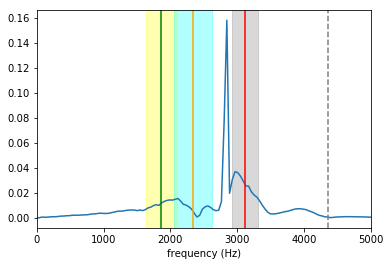

data/SLy-q09-M1300.h_l2_m2.r500.t-1500_5000.dat
1.130710953476583


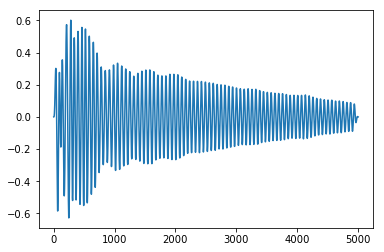

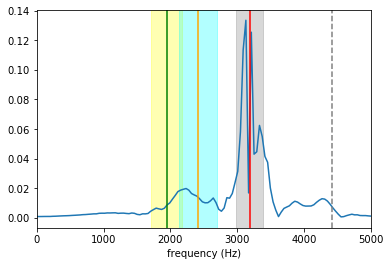

In [18]:

for eos in EOS:
    
    for q in Q:
        for mas in MASS:
            for p in point:
                name='data/'+eos+'-q'+q+'-M'+mas+'.h_l2_m2.r500.t-1500_'+p+'.dat'
    
                try:
                    
                    f=open(name,'r')
                    print(name)
                    lines=f.readlines()[23:]

                    result1=[]
                    result2=[]
                    result3=[]
                    for x in lines:
                        for i in range(len(x.split(' '))):
                            if x.split(' ')[i]!='':
                                result1.append(x.split(' ')[i])
                                for j in range(i+1,len(x.split(' '))): 
                                    if x.split(' ')[j]!='':
                                        result2.append(x.split(' ')[j])
                                        for k in range(j+1,len(x.split(' '))):
                                            if x.split(' ')[k]!='':
                                                result3.append(x.split(' ')[k])
                                                break
                                        break
                                break
                    
                    time=[float(i) for i in result1]
                    rh1=[float(i) for i in result2]
                    rh2=[float(i) for i in result3]

                    rh=np.empty(len(rh1))
                    for i in range(len(rh1)):
                        rh[i]=rh1[i]+rh2[i]
                    
                    
                    
                    bn=open('data/BNS/'+eos+'-q'+q+'-M'+mas+'.bns')
                    blines=bn.readlines()
                    exec(blines[8])
                    exec(blines[9])
                    mass=mass1+mass2
                    q2=mass1/mass2
                    Mc=pow(q2/pow(1+q2,2),3/5)*mass
                    print(Mc)
                    m_r=np.load('tid_def/'+eos+'.npy')
                    mx=np.amax(m_r[0])
                    idx=np.where(m_r[0]==mx)
                    idx=idx[0][0]
                    cs=spline(m_r[0][1:idx],m_r[1][1:idx])
                    r68=np.zeros((1,2))
                    r68[0,0]=cs(1.6)*Length/1.0e5
                    r68[0,1]=cs(1.8)*Length/1.0e5
                    f_2_a=f20_a(Mc,r68[0,0])    
                    f_s_a=fspir_a(Mc,r68[0,1])
                    f_p_a=fpeak_a(Mc,r68[0,1])
                    f_0_a=2*f_p_a-f_2_a
                    
                    fq,fd,tim,dat=analyze(rh,time,mass)
                    
                    plt.plot(tim,dat)
                    plt.show()
                    
                    plt.plot(fq*Frequency,fd)
                    ax=plt.subplot()
                    ax.axvline(x=(f_p_a*Mc)*1000,color='r',label='peak')
                    ax.axvspan((f_p_a*Mc)*1000-196, (f_p_a*Mc)*1000+196, alpha=0.3, color='grey')
                    ax.axvline(x=(f_2_a*Mc)*1000,color='g',label='2-0')
                    ax.axvspan((f_2_a*Mc)*1000-229, (f_2_a*Mc)*1000+229, alpha=0.3, color='yellow')
                    ax.axvline((f_s_a*Mc)*1000,color='orange',label='spiral') 
                    ax.axvspan((f_s_a*Mc)*1000-286, (f_s_a*Mc)*1000+286, alpha=0.3, color='cyan')
                    ax.axvline((f_0_a*Mc)*1000,linestyle="--",color='grey',label='2+0') 
                    plt.xlim(0,5000)
                    plt.xlabel('frequency (Hz)')
                    plt.show()
                    
                except OSError:
                    pass



data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


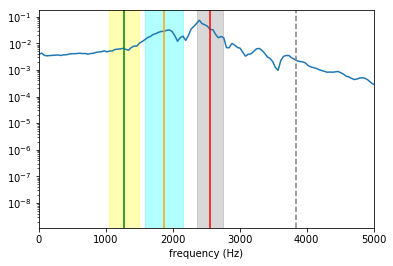

data/ALF2-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


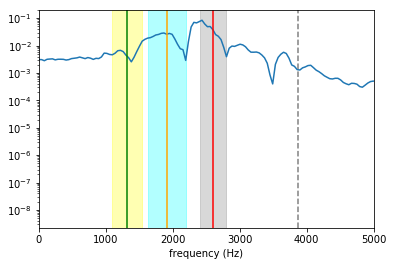

data/ALF2-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


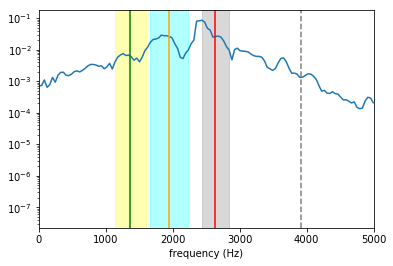

data/ALF2-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


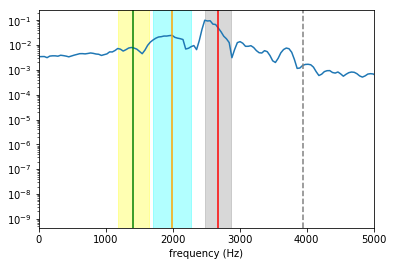

data/ALF2-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


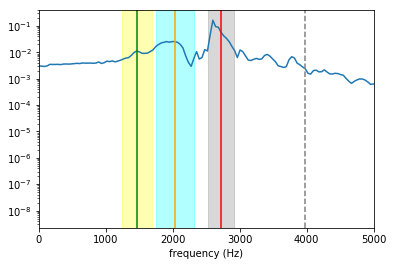

data/ALF2-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


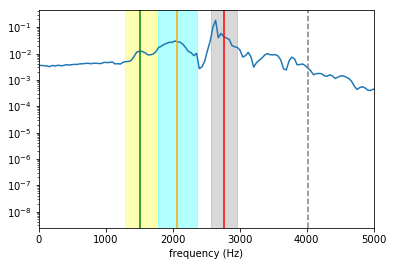

data/ALF2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


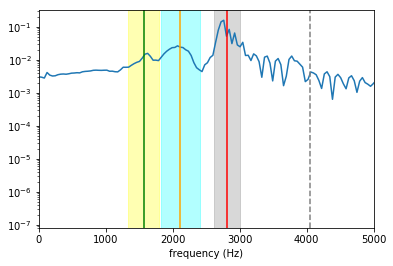

data/ALF2-q10-M1375.h_l2_m2.r500.t-1500_3500.dat
1.1970070245321707


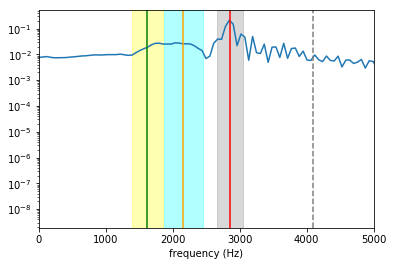

data/ALF2-q10-M1400.h_l2_m2.r500.t-1500_3000.dat
1.2187707886145738


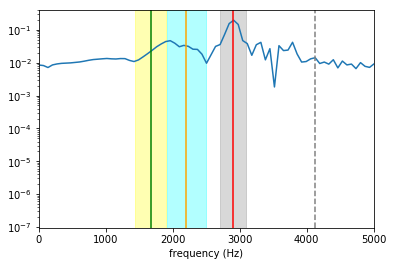

data/ALF2-q10-M1500.h_l2_m2.r500.t-1500_500.dat
1.3058258449441862


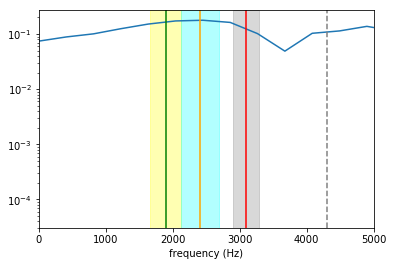

data/APR4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


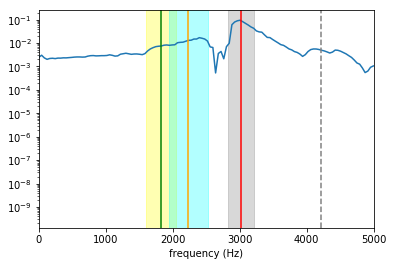

data/APR4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


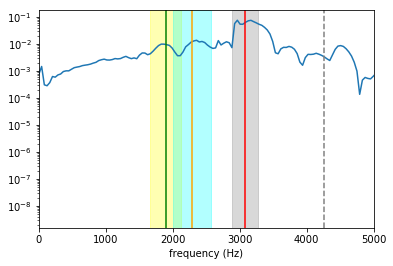

data/APR4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


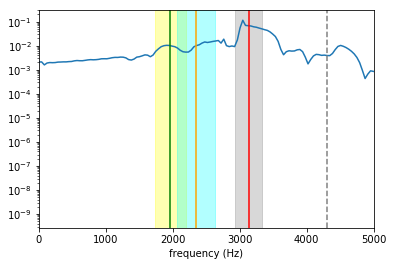

data/APR4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


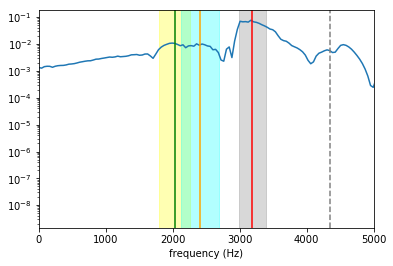

data/APR4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


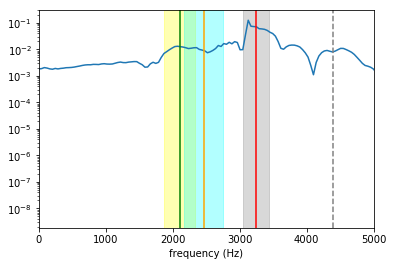

data/APR4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


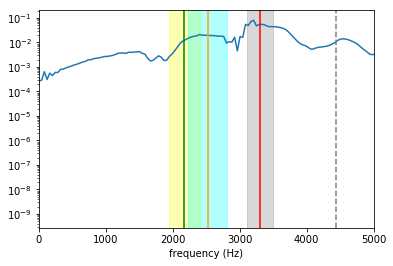

data/APR4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


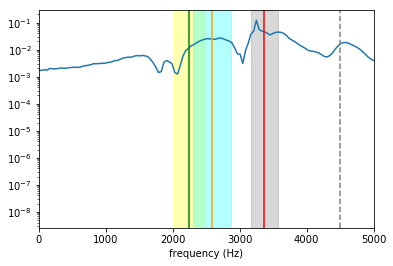

data/APR4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707


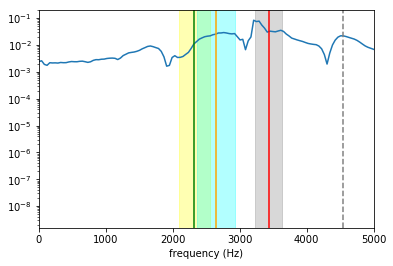

data/APR4-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.2187707886145738


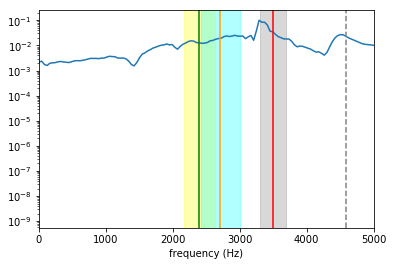

data/APR4-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.3058258449441862


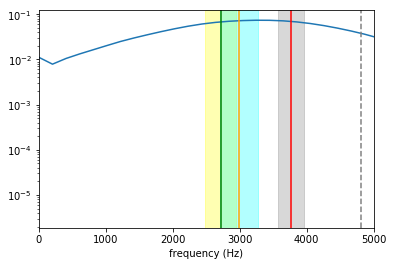

data/GAM2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676
data/GAM2-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707
data/GAM2-q10-M1400.h_l2_m2.r500.t-1500_5000.dat
1.2187707886145738
data/GAM2-q10-M1425.h_l2_m2.r500.t-1500_5000.dat
1.2405345526969769
data/GAM2-q10-M1450.h_l2_m2.r500.t-1500_5000.dat
1.26229831677938
data/GNH3-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


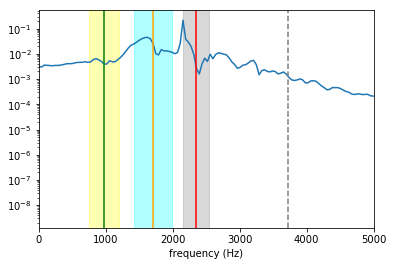

data/GNH3-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


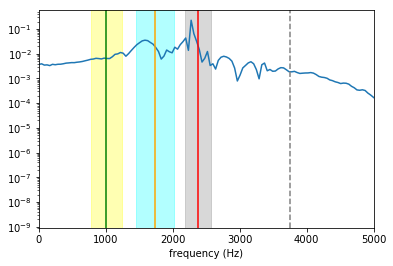

data/GNH3-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


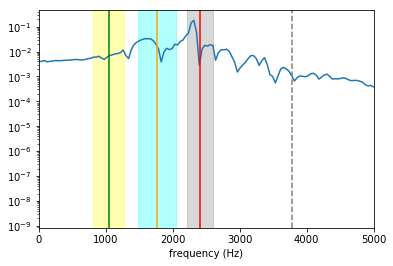

data/GNH3-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


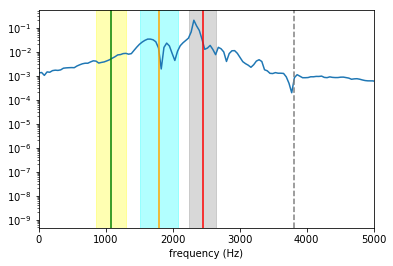

data/GNH3-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


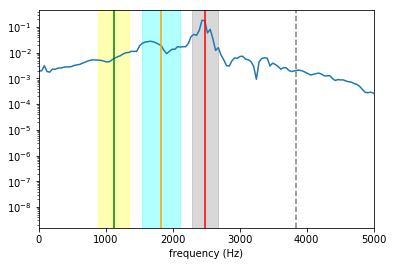

data/GNH3-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


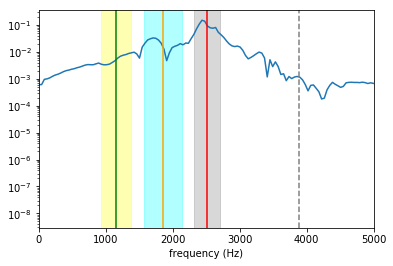

data/GNH3-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


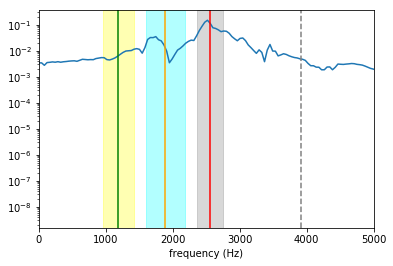

data/GNH3-q10-M1375.h_l2_m2.r500.t-1500_3000.dat
1.1970070245321707


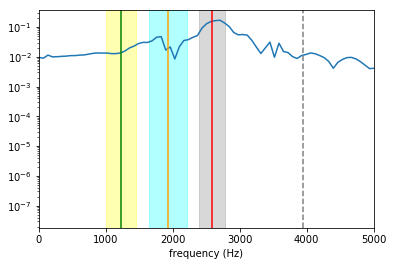

data/GNH3-q10-M1400.h_l2_m2.r500.t-1500_2500.dat
1.2187707886145738


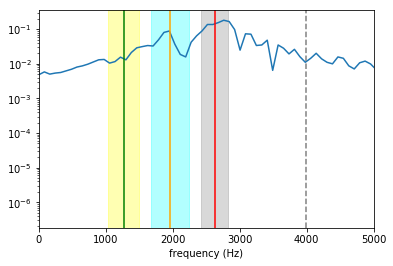

data/GNH3-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.3058258449441862


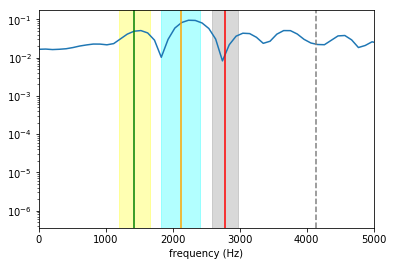

data/GNH3-q08-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1035385005165994


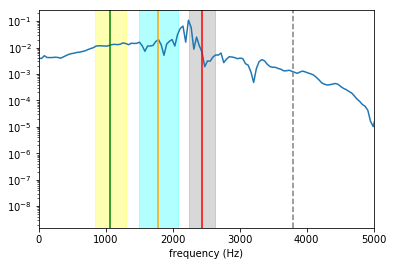

data/GNH3-q09-M1300.h_l2_m2.r500.t-1500_5000.dat
1.130710953476583


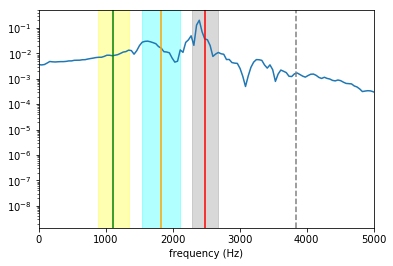

data/H4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


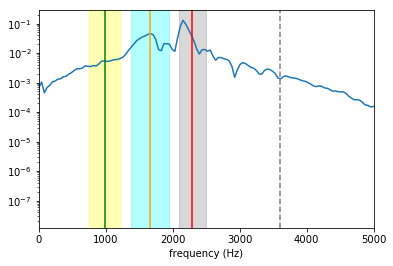

data/H4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


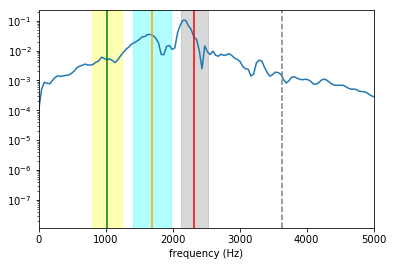

data/H4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


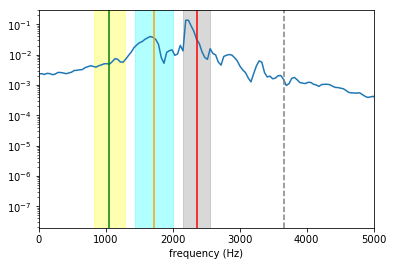

data/H4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


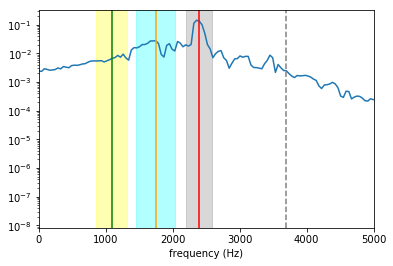

data/H4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


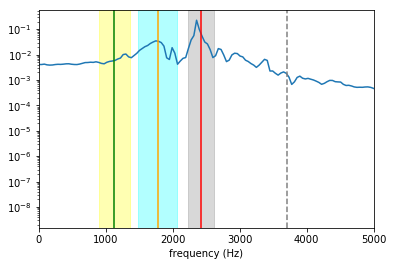

data/H4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


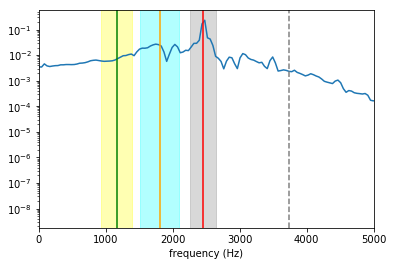

data/H4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


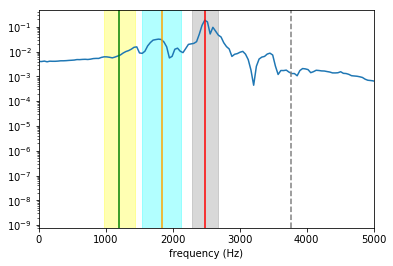

data/H4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat
1.1970070245321707


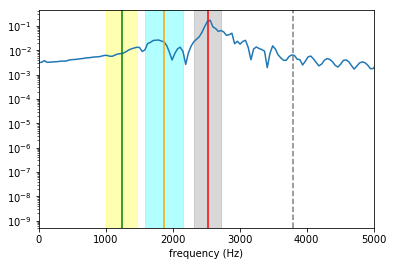

data/H4-q10-M1400.h_l2_m2.r500.t-1500_3500.dat
1.2187707886145738


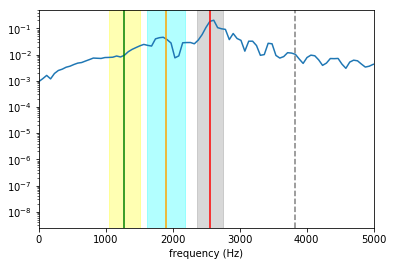

data/H4-q10-M1500.h_l2_m2.r500.t-1500_2000.dat
1.3058258449441862


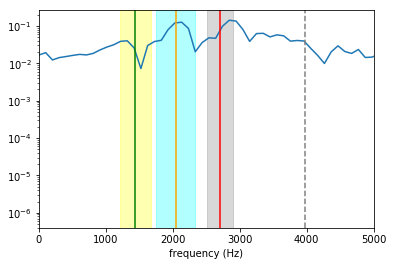

data/SLy-q10-M1200.h_l2_m2.r500.t-1500_5000.dat
1.044660675955349


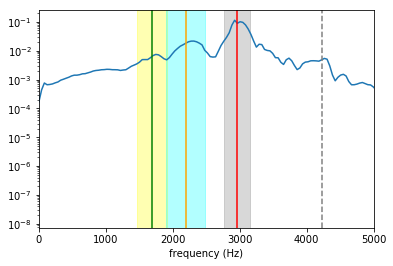

data/SLy-q10-M1225.h_l2_m2.r500.t-1500_5000.dat
1.066424440037752


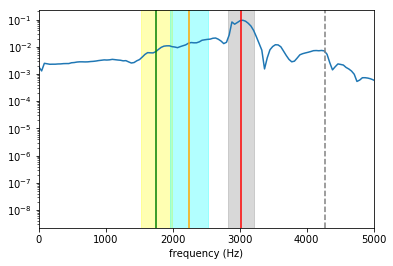

data/SLy-q10-M1250.h_l2_m2.r500.t-1500_5000.dat
1.0881882041201552


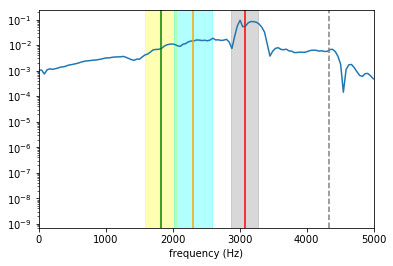

data/SLy-q10-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1099519682025583


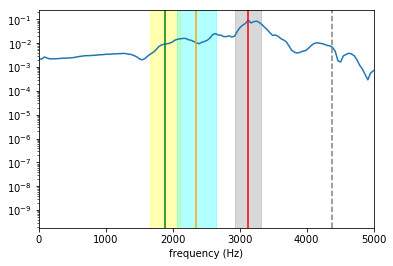

data/SLy-q10-M1300.h_l2_m2.r500.t-1500_5000.dat
1.1317157322849614


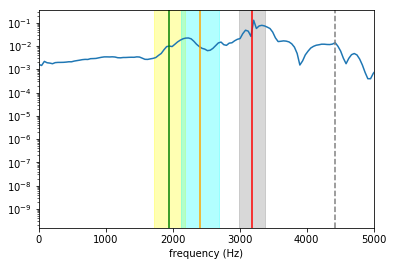

data/SLy-q10-M1325.h_l2_m2.r500.t-1500_5000.dat
1.1534794963673645


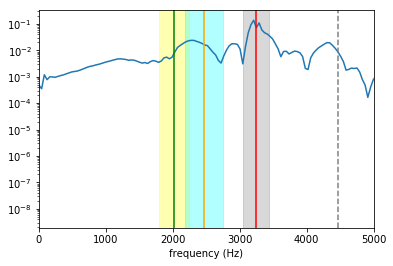

data/SLy-q10-M1350.h_l2_m2.r500.t-1500_5000.dat
1.1752432604497676


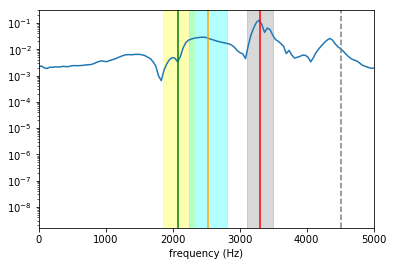

data/SLy-q10-M1375.h_l2_m2.r500.t-1500_2000.dat
1.1970070245321707


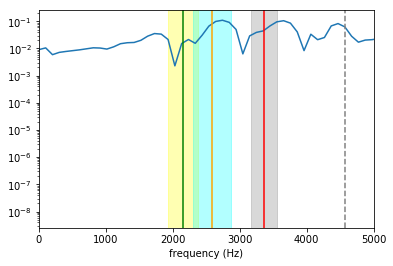

data/SLy-q10-M1400.h_l2_m2.r500.t-1500_1000.dat
1.2187707886145738


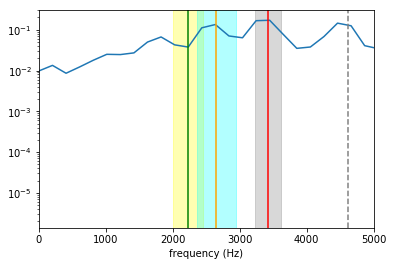

data/SLy-q10-M1500.h_l2_m2.r500.t-1500_1000.dat
1.3058258449441862


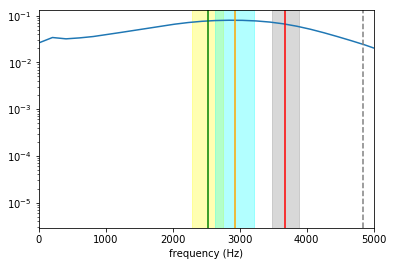

data/SLy-q08-M1275.h_l2_m2.r500.t-1500_5000.dat
1.1035385005165994


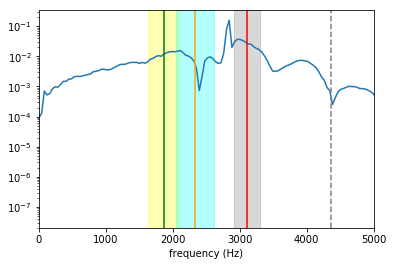

data/SLy-q09-M1300.h_l2_m2.r500.t-1500_5000.dat
1.130710953476583


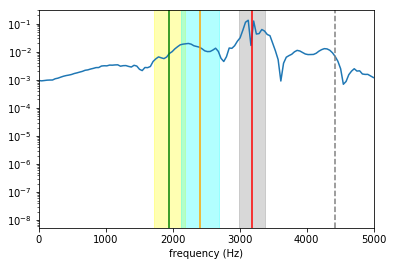

In [19]:

for eos in EOS:
    
    for q in Q:
        for mas in MASS:
            for p in point:
                name='data/'+eos+'-q'+q+'-M'+mas+'.h_l2_m2.r500.t-1500_'+p+'.dat'
    
                try:
                    
                    f=open(name,'r')
                    print(name)
                    lines=f.readlines()[23:]

                    result1=[]
                    result2=[]
                    result3=[]
                    for x in lines:
                        for i in range(len(x.split(' '))):
                            if x.split(' ')[i]!='':
                                result1.append(x.split(' ')[i])
                                for j in range(i+1,len(x.split(' '))): 
                                    if x.split(' ')[j]!='':
                                        result2.append(x.split(' ')[j])
                                        for k in range(j+1,len(x.split(' '))):
                                            if x.split(' ')[k]!='':
                                                result3.append(x.split(' ')[k])
                                                break
                                        break
                                break
                    
                    time=[float(i) for i in result1]
                    rh1=[float(i) for i in result2]
                    rh2=[float(i) for i in result3]

                    rh=np.empty(len(rh1))
                    for i in range(len(rh1)):
                        rh[i]=rh1[i]+rh2[i]
                    
                    
                    
                    bn=open('data/BNS/'+eos+'-q'+q+'-M'+mas+'.bns')
                    blines=bn.readlines()
                    exec(blines[8])
                    exec(blines[9])
                    mass=mass1+mass2
                    q2=mass1/mass2
                    Mc=pow(q2/pow(1+q2,2),3/5)*mass
                    print(Mc)
                    m_r=np.load('tid_def/'+eos+'.npy')
                    mx=np.amax(m_r[0])
                    idx=np.where(m_r[0]==mx)
                    idx=idx[0][0]
                    cs=spline(m_r[0][1:idx],m_r[1][1:idx])
                    r68=np.zeros((1,2))
                    r68[0,0]=cs(1.6)*Length/1.0e5
                    r68[0,1]=cs(1.8)*Length/1.0e5
                    f_2_a=f20_a(Mc,r68[0,0])    
                    f_s_a=fspir_a(Mc,r68[0,1])
                    f_p_a=fpeak_a(Mc,r68[0,1])
                    f_0_a=2*f_p_a-f_2_a
                    
                    
                    fq,fd,tim,dat=analyze(rh,time,mass)
                    
                    
                    
                    plt.plot(fq*Frequency,fd)
                    ax=plt.subplot()
                    ax.axvline(x=(f_p_a*Mc)*1000,color='r',label='peak')
                    ax.axvspan((f_p_a*Mc)*1000-196, (f_p_a*Mc)*1000+196, alpha=0.3, color='grey')
                    ax.axvline(x=(f_2_a*Mc)*1000,color='g',label='2-0')
                    ax.axvspan((f_2_a*Mc)*1000-229, (f_2_a*Mc)*1000+229, alpha=0.3, color='yellow')
                    ax.axvline((f_s_a*Mc)*1000,color='orange',label='spiral') 
                    ax.axvspan((f_s_a*Mc)*1000-286, (f_s_a*Mc)*1000+286, alpha=0.3, color='cyan')
                    ax.axvline((f_0_a*Mc)*1000,linestyle="--",color='grey',label='2+0') 
                    plt.xlim(0,5000)
                    plt.yscale('log')
                    plt.xlabel('frequency (Hz)')
                    plt.show()
                    
                except OSError:
                    pass

